# CIV1498 - Introduction to Data Science
## Project 2 - Is this Loan a Bad Debt or Not?!

### MOTIVATION

The US Small Business Administration (SBA) was established in 1953 with the goal of promoting and aiding small businesses in the credit market in the United States (SBA Overview and History, US Small Business Administration (2015)). Small businesses have historically been a major source of job creation in the United States thus encouraging small business formation and growth offers social advantages by providing jobs and lowering unemployment. The SBA helps these small firms by offering a loan guarantee program, which is designed to encourage banks to give small businesses loans. The SBA functions similarly to an insurance company, reducing risk for banks and small businesses by taking on some of the risk by guaranteeing a percentage of the loan. In the case that a loan goes into default, SBA then covers the amount they guaranteed. This increases the risk to the SBA however, which can sometimes make it difficult to get accepted for one of their loan programs.

Many successful start-ups, such as FedEx and Apple, have benefited from SBA loan guarantees. However, there have been reports of SBA-guaranteed loans being defaulted on by small firms and/or start-ups. The rate of default on these loans has been a source of controversy for decades. Conservative economists believe that credit markets can function effectively without the involvement of the government. Supporters of SBA guaranteed loans claim that the social advantages of small firms creating jobs significantly outweigh the costs of defaulted loans. Because SBA loans only guarantee a fraction of the total loan sum, if a small business fails on its SBA-guaranteed loan, banks will suffer some losses. Therefore, banks are still faced with a difficult choice as to whether they should grant such a loan because of the high risk of default. 

One way to inform the Bank's and SBA's decision making is through analyzing relevant historical data such as the dataset being analyzed in this project.

The goal of this notebook is to predict whether the loan applied will be a bad debt (defaulted) or not given all the data attributing to the loan, provided in the dataset being analyzed.

In [99]:
# Importing basic libraries used for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Useful_Functions import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Loading the SBA Loans Dataset
loans = pd.read_csv('SBAnational.csv')
loans.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


Some basic information on the dataset:

In [101]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

#### The Data
The below table displays the description of all the variables in the dataset,

Variable Name | Data Type | Description 
---|---|---
LoanNr_ChkDgt | Text | Identifier – Primary key  
Name | Text | Borrower name 
City | Text | Borrower city 
State | Text | Borrower state 
Zip | Text | Borrower zip code  
Bank | Text | Bank name 
BankState | Text | Bank state 
NAICS | Number | North American Industry Classification System code  
ApprovalDate | Date-Time | Date SBA commitment issued 
ApprovalFY | Number | Fiscal year of commitment 
Term | Number | Loan term in months  
NoEmp | Number | Number of business employees  
NewExist | Number | 1 = Existing business, 2 = New business
CreateJob | Number | Number of jobs created  
RetainedJob | Number | Number of jobs retained  
FranchiseCode | Number | Franchise code, (00000 or 00001) = No franchise  
UrbanRural | Number | 1 = Urban, 2 = rural, 0 = undefined  
RevLineCr | Text | Revolving line of credit: Y = Yes, N = No 
LowDoc | Text | LowDoc Loan Program: Y = Yes, N = No 
ChgOffDate | Date-Time | The date when a loan is declared to be in default 
DisbursementDate | Date-Time | Disbursement date 
DisbursementGross | Currency | Amount disbursed 
BalanceGross | Currency | Gross amount outstanding 
MIS_Status | Text | Loan status charged off = CHGOFF, Paid in full = PIF 
ChgOffPrinGr | Currency | Charged-off amount 
GrAppv | Currency | Gross amount of loan approved by bank 
SBA_Appv | Currency | SBA’s guaranteed amount of approved loan 

### Pre-Processing

Let's checkout the null values in the dataset,

In [102]:
loans.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Let's create a visualization of the missing data. Note that not all missing data are captured by the graph, some missing data take the value of 0, which is not null. Column by column analysis is performed later.

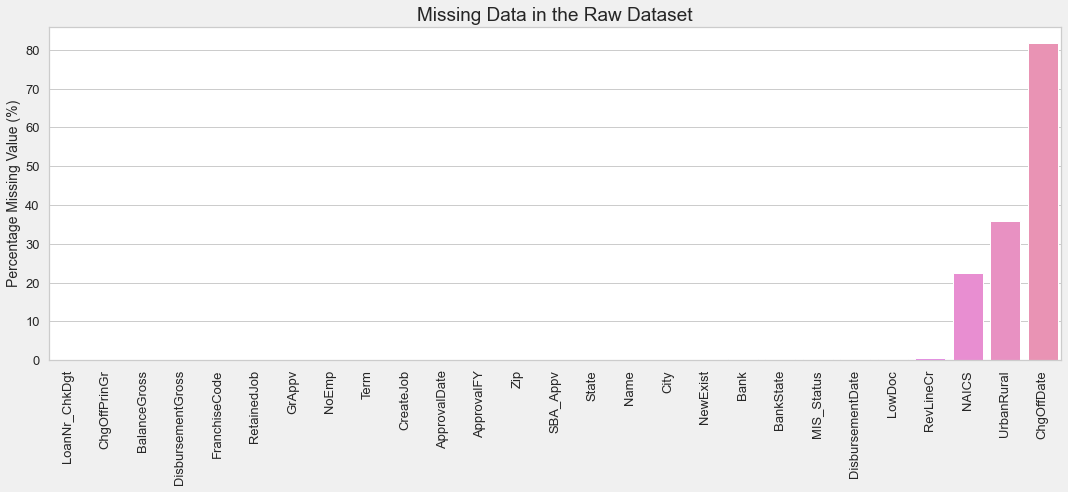

In [103]:
#create a barplot of missing values
missing_values = loans.isnull().sum() / len(loans)
missing_values['NAICS'] = (loans['NAICS'] == 0).sum()/len(loans)
missing_values['UrbanRural'] = (loans['UrbanRural'] == 0).sum()/len(loans)
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index
missing_values['count'] = missing_values['count'] * 100

plt.figure(figsize=(15,7))
sns.set(style="whitegrid", color_codes=True)
ax1 = sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Missing Data in the Raw Dataset',fontsize = 19)
ax1.set_ylabel('Percentage Missing Value (%)',fontsize=14)
ax1.set_xlabel('',fontsize=0)
plt.tight_layout()
plt.savefig('Missing Data in the Raw Dataset')
plt.show()

The columns ‘ChgOffDate’ is insignificant as the focus of the analysis is to predict whether a loan gets charged off (defaults) rather then when it happens, but the null values in other variables needs to be processed. Before we proceed, we want to drop the 'ChgFffDate' column.

In [104]:
loans = loans.drop(['ChgOffDate'], axis=1)
loans

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,0,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,0,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,0,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,0,N,Y,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,0,N,N,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,0,N,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,0,Y,N,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,0,N,N,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,0,N,Y,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


The next step is filling in the missing values in the 'UrbanRural' column. To do this, we can perform a machine learning on existing data, and use that to predict whether a business is located is rural or urban. Another way is using the zip code information and external dataset to aid us in determining rural/urban. Considering the advantages and drawbacks of both methods, the team decided to proceed with the second method. The external data set can be downloaded here: https://www.psc.isr.umich.edu/dis/data/kb/answer/1102.html

Load the data set

In [105]:
urbanruralzip = pd.read_csv('UrbanRuralZipcodes.csv')
print(urbanruralzip.head())

    zip  fips (st+cou) cname (abbr)  allocate   zpop   lzpop  lzden  ru2003  \
0  1001          25013     HampdenM     1.000  16576   9.716  7.209       2   
1  1002          25015     Hampshir     0.985  36794  10.513  6.463       2   
2  1005          25027     Worceste     1.000   5077   8.532  4.788       2   
3  1007          25015     Hampshir     1.000  13017   9.474  5.491       2   
4  1008          25013     HampdenM     1.000   1235   7.119  3.166       2   

   ui2003  ruca2  migmet  
0       2    1.0   100.0  
1       2    4.1   100.0  
2       2    2.0   100.0  
3       2    4.1   100.0  
4       2    2.0   100.0  


Ideally we want a dataset that tells us directly whether a zip is rural or urban. The team did manage to find such dataset, however, the dataset is not free, we didnt want to pay an annual subscription fee of $500. What we settled on is a less ideal dataset that contains the percentage of residents working in an urban setting for each zip code (under column 'migmet'). Logically, if more people are working in an urban setting in a community, then the business in that community is probably urban, and vice versa.

Drop useless columns

In [106]:
urbanruralzip_for_merge = urbanruralzip[['zip','migmet']]

Merge the new dataframe to our raw dataframe on column 'zip'

In [107]:
merged_with_urban = loans.merge(urbanruralzip_for_merge, how='left', left_on = 'Zip', right_on = 'zip')
merged_with_urban = merged_with_urban.drop(['zip'], axis=1)
merged_with_urban.rename(columns = {'migmet':'UrbanWorkerPercentage'}, inplace = True)
merged_with_urban


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,UrbanWorkerPercentage
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",100.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",100.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",100.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",100.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",100.0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00",100.0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00",100.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",NaN


Next, we want to visualize the existing distribution of urban vs rural to determine a threshold for deciding whether an area is urban or rural

  UrbanRural UrbanWorkerPercentage                    
                              mean   count    max  min
0  Undefined             82.941605  308514  100.0  0.0
1      Urban             95.471383  458602  100.0  0.0
2      Rural             62.758115  102656  100.0  0.0


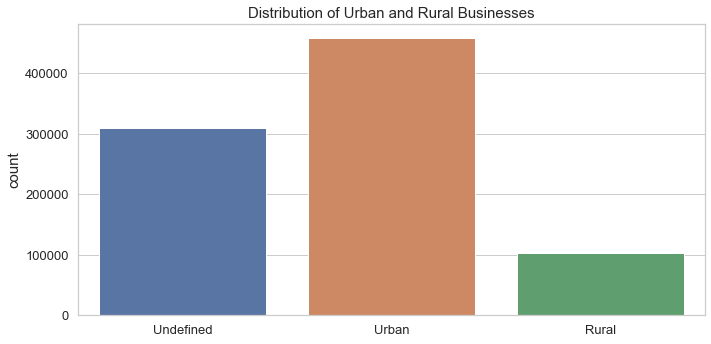

In [108]:
urban_df = merged_with_urban.groupby(['UrbanRural']).agg({'UrbanWorkerPercentage': ['mean','count','max','min']})
urban_df = urban_df.reset_index()
urban_df['UrbanRural'] = urban_df['UrbanRural'].apply(lambda x: 'Undefined' if x == 0 else x).apply(lambda x: 'Urban' if x == 1 else x).apply(lambda x: 'Rural' if x == 2 else x)
print(urban_df)
plt.figure(figsize=(10,5))
plt.title('Distribution of Urban and Rural Businesses', fontsize = 15)
y = urban_df['UrbanWorkerPercentage']['count']
ax3 = sns.barplot(x = 'UrbanRural',y = y,data = urban_df)
plt.xlabel('', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.savefig('Distribution of Urban and Rural Businesses')

Seems like majority of the businesses is in urban area, and urban business is about 4 times more than rural business, when we assign the value to the missing entries we want to keep that urban to rural ratio. First find the percentage of rural businesses, and then find the urban worker percentage assocaited with that percentile

In [11]:
percent_rural = merged_with_urban[merged_with_urban['UrbanRural'] == 2].shape[0]/(merged_with_urban[merged_with_urban['UrbanRural'] == 1].shape[0] + merged_with_urban[merged_with_urban['UrbanRural'] == 2].shape[0])
threshold = merged_with_urban.quantile(percent_rural)['UrbanWorkerPercentage']
print(threshold)

100.0


Looks like the threshold is 100, so any zip code with urban worker percentage less than 100% will be rural. First separate the dataframe by whether a row has missing urban/rural info. And then drop the rows with missing urban worker percentage. Next fill in the values or urban and rural, and concatenante the two dataframes.

In [12]:
merged_with_urban_not_missing = merged_with_urban[merged_with_urban['UrbanRural'] != 0]
merged_with_urban_missing = merged_with_urban[merged_with_urban['UrbanRural'] == 0]
merged_with_urban_missing = merged_with_urban_missing.dropna(subset=['UrbanWorkerPercentage'])
merged_with_urban_missing.loc[merged_with_urban_missing['UrbanWorkerPercentage'] == 100, 'UrbanRural'] = 1
merged_with_urban_missing.loc[merged_with_urban_missing['UrbanWorkerPercentage'] < 100, 'UrbanRural'] = 2


lets check the portion of rural in the dataset

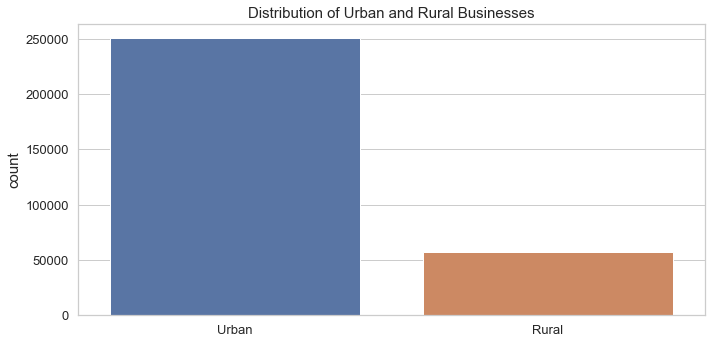

In [13]:
urban_df = merged_with_urban_missing.groupby(['UrbanRural']).agg({'UrbanWorkerPercentage': ['mean','count','max','min']})
urban_df = urban_df.reset_index()
urban_df['UrbanRural'] = urban_df['UrbanRural'].apply(lambda x: 'Undefined' if x == 0 else x).apply(lambda x: 'Urban' if x == 1 else x).apply(lambda x: 'Rural' if x == 2 else x)

plt.figure(figsize=(10,5))
plt.title('Distribution of Urban and Rural Businesses', fontsize = 15)
y = urban_df['UrbanWorkerPercentage']['count']
ax3 = sns.barplot(x = 'UrbanRural',y = y,data = urban_df)
plt.xlabel('', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.savefig('Distribution of Urban and Rural Businesses')

Rural is about 20% of urban, so ratio is about right, now we want to concatenate dataframes and drop urbanworkerpercentage column

In [14]:
df_with_urbanrural = pd.concat([merged_with_urban_missing, merged_with_urban_not_missing], axis=0)
df_with_urbanrural = df_with_urbanrural.drop('UrbanWorkerPercentage',axis = 1)
df_with_urbanrural

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,1,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,1,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,1,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,1,N,Y,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,1,N,N,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896389,9933753004,HEADS & TAILS,ANTIOCH,CA,94509,BANK OF AGRICULTURE & COMMERCE,CA,0,30-Jan-97,1997,...,1,N,N,28-Feb-97,"$12,218.00",$0.00,P I F,$0.00,"$20,000.00","$16,000.00"
898240,9976073001,"CAFFE' DIVA ESPRESSO, INC.",EUGENE,OR,97401,PACIFIC CONTINENTAL BANK,OR,0,20-Feb-97,1997,...,1,N,N,28-Feb-97,"$100,000.00",$0.00,CHGOFF,"$9,771.00","$100,000.00","$80,000.00"
898660,9984863002,SISTERS' & BROTHERS' BOOKSTORE,ALBUQUERQUE,NM,87108,WELLS FARGO BANK NATL ASSOC,SD,451211,24-Feb-97,1997,...,1,N,N,31-Mar-97,"$57,000.00",$0.00,P I F,$0.00,"$57,000.00","$45,600.00"
898731,9986753008,ISSALAK,SALEM,MA,1970,NATL GRAND BK OF MARBLEHEAD,MA,0,25-Feb-97,1997,...,1,N,N,30-Apr-97,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"


With missing rural and urban info accounted for, the next is filling in the missing industry info. We want to build a logistic regression model that takes in the name of the business and output the probability of it in a certain industry. To make things simpler, we want to reduce the number of industries, instead of using the entire NAICS code, we will take the first two numbers, which represent the broader industry that a business is in. We downloaded a csv file for general NAICS codes.

In [15]:
NAICS_DF = pd.read_csv('General Industry Codes.csv')
NAICS_DF = NAICS_DF.set_index('Code')
NAICS_DF

,IndustryName
Code,
11,"Agriculture, forestry, fishing and hunting"
21,"Mining, quarrying, and oil and gas extraction"
22,Utilities
23,Construction
31,Manufacturing
32,Manufacturing
33,Manufacturing
41,Wholesale trade
42,Wholesale trade


Now we want to append an extra column to the dataframe that has the broader industry info for each row, to do this, we defined a function called 'industry_identifier', the function is found in the 'Useful_Functions.py'. The function only works if the NAICS column is not 0, so drop the rows with missing industry info for now.

In [16]:
No_missing_industry_df = df_with_urbanrural[df_with_urbanrural['NAICS'] != 0]
missing_industry_df = df_with_urbanrural[df_with_urbanrural['NAICS'] == 0]
No_missing_industry_df['Industry'] = No_missing_industry_df['NAICS']
No_missing_industry_df['Industry'] = No_missing_industry_df['Industry'].apply(lambda x: industry_identifier(x,NAICS_DF))

In [17]:
No_missing_industry_df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",Retail trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",Accommodation and food services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",Health care and social assistance
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,...,N,N,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00",Manufacturing
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,...,N,Y,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00",Other services (except public administration)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894809,9898154001,ARTESIA CABINETS,LAS VEGAS,NV,89118,NEVADA ST. DEVEL CORP,NV,235510,6-Feb-06,2006,...,0,N,16-May-07,"$509,000.00",$0.00,P I F,$0.00,"$509,000.00","$509,000.00",Construction
894814,9898254007,VDL MOTOR SPORTS LLC,VAIL,AZ,85641,COMPASS BANK,AL,512110,6-Feb-06,2006,...,Y,N,28-Feb-06,"$15,635.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00",Information and cultural industries
894832,9898734009,"SHADHESHWAIR MATAJI, INC",BRIDGEVIEW,IL,60455,"SOMERCOR 504, INC.",IL,721110,6-Feb-06,2006,...,0,N,12-Apr-06,"$1,038,000.00",$0.00,P I F,$0.00,"$1,038,000.00","$1,038,000.00",Accommodation and food services
896082,9927983007,"TUBS TO GO SPA MFG., LLP",HELENA,MT,59635,VALLEY BK OF HELENA A DIVISION,MT,326191,29-Jan-97,1997,...,N,N,31-Mar-97,"$170,000.00",$0.00,CHGOFF,"$170,124.00","$170,000.00","$127,500.00",Manufacturing


Looks good, before we proceed with train, we want to split the dataset into training and testing sets, but before that need to drop rows without business name info

In [18]:
No_missing_industry_df = No_missing_industry_df.dropna(subset=['Name'])
missing_industry_df = missing_industry_df.dropna(subset=['Name'])

In [19]:
train, test = train_test_split(No_missing_industry_df, test_size=0.2, random_state=0, stratify=No_missing_industry_df['Industry'])

The next step is find the most common words in each industry (the function used here is 'find_n_most_common_words', and train the model with those words, and use the model to output the probability that a business is in certain industry

In [20]:
def find_n_most_common_words(df,industry,n=250):

    df = df.copy()
    df = df[df['Industry'] == industry]

    df['Name'] = df['Name'].str.lower()
    df['Name'] = df['Name'].str.replace(',',' ')
    df['Name'] = df['Name'].str.replace('.',' ')
    df['Name'] = df['Name'].str.split(' ')


    list_of_all_words = [item for sublist in df['Name'] for item in sublist]

    new_df = pd.DataFrame(list_of_all_words,columns = ['words'])
    new_df_groupped = new_df.groupby(['words'])['words'].count().sort_values(ascending = False)
    most_common_words = new_df_groupped.index.to_list()[0:n]

    return most_common_words

Test the function

In [21]:
print(find_n_most_common_words(train,'Educational services')) #try this for Educations service industry, looks good
print(find_n_most_common_words(train,'Manufacturing')) #some makes sense, many are random

['', 'inc', 'llc', 'of', 'school', 'center', 'learning', 'academy', 'the', 'dance', '&', 'dba', 'l', 'arts', 'training', 'and', 'institute', 'gymnastics', 'a', 'in', 'driving', 'enterprises', 'music', 'college', 'services', 'martial', 'studio', 'montessori', 'huntington', 'education', 'sylvan', 'c', 'international', 'i', 'yoga', 'karate', 'educational', 'new', 'solutions', 'group', 'consulting', 'for', 'computer', 'associates', 'j', 's', 'beauty', 'tutoring', 'sports', 'm', 'career', 'aviation', 'art', 'kids', 'club', 'll', 'professional', 'taekwondo', 'corp', 'world', 'little', 'fitness', 'gym', 'american', 'cheer', 'company', 'golf', 'tae', 'business', 'do', 'r', 'studios', 'ltd', 'california', 'elite', 'corporation', 'd', 'to', 'language', 'schools', 'systems', 'kwon', 'centers', 'management', 'unlimited', 'south', 'usa', 't', 'technology', 'e', 'all', 'technologies', 'young', 'health', 'salon', 'ballet', 'united', 'creative', 'tech', 'hair', 'mountain', 'family', 'w', 'service', 'k

The results make sense, but there are some overlaps between the two industries, we want to remove overlaps, first is finding the common words in each industry, do so with function 'intersection'.

In [22]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [23]:
list_of_words= find_n_most_common_words(train,'Manufacturing')
list_of_industry = train['Industry'].unique()

for industry in list_of_industry:
    industry_words = find_n_most_common_words(train,industry)
    list_of_words = intersection(industry_words,list_of_words)

In [24]:
print(list_of_words)

['', 'inc', 'llc', 'service', '&', 'services', 'co', 'the', 'corporation', 'l', 'and', 'of', 'j', 's', 'valley', 'p', 'corp', 'a', 'r', 'c', 'w', 'enterprises', 'd', 'm']


Now we want to train the model, and test the performance based on false alarm rate, because we will end up dropping rows with no industry information after running the logistic regression, so we want to optimize for false alarm rate

In [25]:
iteration = 0
for industry in list_of_industry:
    industry_name_words = find_n_most_common_words(train,industry)
    industry_name_words_revised = [item for item in industry_name_words if item not in list_of_words]#filter out the overlapping words
    industry_name_words_revised = [item for item in industry_name_words_revised if len(item)>1] #filter out words that has only 1 character
    x_train = word_detector(industry_name_words_revised,train['Name'])
    y_train = pd.Series(np.array(train['Industry']==industry)).astype(int)
    model = LogisticRegression(solver='liblinear', random_state=0)
    model = model.fit(x_train,y_train)
    x_predict = word_detector(industry_name_words_revised,test['Name'])
    y_actual = pd.Series(np.array(test['Industry']==industry)).astype(int)
    y_predict = model.predict(x_predict)
    y_predict_proba = model.predict_proba(x_predict)[:,1]
    test[industry] = y_predict_proba
    #print(y_predict)
    #print(y_actual.to_list())
    print(false_alarm_rate(y_actual.to_list(),y_predict))
    #print(iteration)
    iteration = iteration + 1

0.007277928855494601
0.0032460732984293194
0.006340455905356357
0.019841691457713556
0.0014380571554349023
0.0009860564316443768
0.01110870489344466
0.007105223060699135
0.0022618246864120513
0.009102657297471933
0.009952
0.010426016155917425
0.00023942016788432377
0.004743095297337646
0.0032773090635310792
0.0015596033310773033
0.0011289081112780854
0.0
0.0
5.7944981240312324e-05


false alarm rate are low, not bad. Next use the model to predict the probabilities and append the probabilities as new columns, with column title as the industry

In [26]:
iteration = 0
for industry in list_of_industry:
    industry_name_words = find_n_most_common_words(train,industry)
    industry_name_words_revised = [item for item in industry_name_words if item not in list_of_words]#filter out the overlapping words
    industry_name_words_revised = [item for item in industry_name_words_revised if len(item)>1] #filter out words that has only 1 character
    x_train = word_detector(industry_name_words_revised,train['Name'])
    y_train = pd.Series(np.array(train['Industry']==industry)).astype(int)
    model = LogisticRegression(solver='liblinear', random_state=0)
    model = model.fit(x_train,y_train)
    x_predict = word_detector(industry_name_words_revised,missing_industry_df['Name'])
    y_predict = model.predict(x_predict)
    y_predict_proba = model.predict_proba(x_predict)[:,1]
    missing_industry_df[industry] = y_predict_proba
    print(iteration)
    iteration = iteration + 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Arbitrarily chose 0.35 for the threshold, if the best probability for an industry is lower than 35%, then the business name is not good enough to determine the industry, we will drop that row

In [70]:
Missing_industry_df_copy = missing_industry_df.copy()
threshold = 0.35
Missing_industry_df_copy['Industry'] = Missing_industry_df_copy[list_of_industry].max(axis=1)
Missing_industry_df_copy = Missing_industry_df_copy[Missing_industry_df_copy['Industry'] >= threshold]
Probability_df = Missing_industry_df_copy[list_of_industry]
Missing_industry_df_copy['Industry'] = Probability_df.apply(lambda x: Probability_df.columns[x.argmax()], axis = 1)
print(Missing_industry_df_copy.shape[0])
Missing_industry_df_copy

102830


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Manufacturing,"Mining, quarrying, and oil and gas extraction",Wholesale trade,Real estate and rental and leasing,Information and cultural industries,"Agriculture, forestry, fishing and hunting",Public administration,Management of companies and enterprises,Utilities,Industry
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,0.081844,0.002221,0.094776,0.008956,0.012048,0.005596,0.000169,0.000378,0.000639,Retail trade
17,1000264008,"FAIRFAX COURT SUBWAY, INC.",CENTREVILLE,VA,20120,BANK OF AMERICA NATL ASSOC,MD,0,28-Feb-97,1997,...,0.053005,0.000413,0.046359,0.008363,0.008595,0.003389,0.000384,0.000199,0.000763,Accommodation and food services
18,1000284003,FANTASTIC SAMS,PLANO,TX,75093,NEWTEK SMALL BUS. FINANCE INC.,NY,0,28-Feb-97,1997,...,0.051859,0.000745,0.042665,0.007320,0.006027,0.003910,0.000169,0.000219,0.000404,Other services (except public administration)
20,1000324002,ECONOLODGE OF DUMAS,DUMAS,TX,79029,"BUSINESS LOAN CENTER, LLC",SC,0,28-Feb-97,1997,...,0.051859,0.000745,0.042665,0.008933,0.007572,0.005596,0.000231,0.000414,0.000335,Accommodation and food services
22,1000394001,NICOLES RESTAURANT,JOHNSTON,RI,2919,BANK OF AMERICA NATL ASSOC,RI,0,28-Feb-97,1997,...,0.051859,0.000745,0.014972,0.007414,0.006027,0.004116,0.000169,0.000224,0.000404,Accommodation and food services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885624,9702953008,ROCKY MOUNTAIN COMPUTERS,COMMERCE CITY,CO,80002,BANK OF THE WEST,CO,0,28-Oct-96,1997,...,0.158300,0.003348,0.042989,0.012529,0.021393,0.004429,0.000282,0.000276,0.001290,Retail trade
885643,9704023004,"THE DUVALL INN, INC.",LEWISTOWN,MT,59457,WELLS FARGO BANK NATL ASSOC,SD,0,28-Oct-96,1997,...,0.063942,0.001502,0.052351,0.009299,0.006758,0.003188,0.000169,0.000238,0.000471,Accommodation and food services
886451,9721213004,MISTER BAGEL OF CAPE COD,HYANNIS,MA,2601,BANK OF AMERICA NATL ASSOC,RI,0,1-Nov-96,1997,...,0.051859,0.000745,0.035994,0.007320,0.006027,0.004901,0.000169,0.000219,0.000451,Accommodation and food services
890560,9817643009,REPOSE MASSAGE THERAPY,BOSTON,MA,2109,CAMBRIDGE TRUST COMPANY,MA,0,6-Dec-96,1997,...,0.051859,0.000745,0.035994,0.009372,0.007513,0.007012,0.000709,0.000197,0.000411,Health care and social assistance


Merge the two dataframes

In [71]:
Missing_industry_df_copy = Missing_industry_df_copy.drop(columns = list_of_industry)

No_missing_industry_df = df_with_urbanrural[df_with_urbanrural['NAICS'] != 0]
No_missing_industry_df['Industry'] = No_missing_industry_df['NAICS']
No_missing_industry_df['Industry'] = No_missing_industry_df['Industry'].apply(lambda x: industry_identifier(x,NAICS_DF))

frames = [No_missing_industry_df, Missing_industry_df_copy]
merged_df = pd.concat(frames)
merged_df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",Retail trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",Accommodation and food services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",Health care and social assistance
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,...,N,N,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00",Manufacturing
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,...,N,Y,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00",Other services (except public administration)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885624,9702953008,ROCKY MOUNTAIN COMPUTERS,COMMERCE CITY,CO,80002,BANK OF THE WEST,CO,0,28-Oct-96,1997,...,N,N,31-May-98,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00",Retail trade
885643,9704023004,"THE DUVALL INN, INC.",LEWISTOWN,MT,59457,WELLS FARGO BANK NATL ASSOC,SD,0,28-Oct-96,1997,...,N,N,27-Dec-98,"$267,000.00",$0.00,P I F,$0.00,"$267,000.00","$200,250.00",Accommodation and food services
886451,9721213004,MISTER BAGEL OF CAPE COD,HYANNIS,MA,2601,BANK OF AMERICA NATL ASSOC,RI,0,1-Nov-96,1997,...,N,N,31-Jan-97,"$228,571.00",$0.00,CHGOFF,"$176,095.00","$250,000.00","$187,500.00",Accommodation and food services
890560,9817643009,REPOSE MASSAGE THERAPY,BOSTON,MA,2109,CAMBRIDGE TRUST COMPANY,MA,0,6-Dec-96,1997,...,N,N,31-Mar-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",Health care and social assistance


Since run time is pretty long, save a checkpoint

In [72]:
merged_df.to_csv('SBAnational_with_industry_added.csv')

In [359]:
merged_df = pd.read_csv('SBAnational_with_industry_added.csv')

Next, we want to inspect the data types of all the columns in the dataset

In [360]:
# Checking Data Type of each feature
merged_df.dtypes

Unnamed: 0             int64
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
Industry              object
dtype: object

In [361]:
merged_df.isnull().sum()

Unnamed: 0              0
LoanNr_ChkDgt           0
Name                   11
City                   11
State                   9
Zip                     0
Bank                 1049
BankState            1055
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              136
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            3371
LowDoc               2582
DisbursementDate     2150
DisbursementGross       0
BalanceGross            0
MIS_Status           1810
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
Industry                0
dtype: int64

The Data Type of some columns needs to be changed as appropriated by the description table

In [362]:
merged_df = merged_df.astype({'Zip': 'str', 'NewExist' : 'str', 'UrbanRural' : 'int'})

The columns involving currency are currently being read as an object data type

In [363]:
currency_cols = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
merged_df[currency_cols].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$517,000.00",$0.00,$0.00,"$517,000.00","$387,750.00"
4,"$45,000.00",$0.00,$0.00,"$45,000.00","$36,000.00"


The values contain ('$' & ','), these characters are to be removed in order to convert the values to a float data type

In [364]:
# Replacing '$' and ',' with white spaces 
for col in currency_cols:
    merged_df[col] = merged_df[col].str.replace('$', '')
    merged_df[col] = merged_df[col].str.replace(',', '')

# Converting the Data Type to 'float64'
merged_df[currency_cols] = merged_df[currency_cols].astype('float64')

merged_df[currency_cols].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,517000.0,0.0,0.0,517000.0,387750.0
4,45000.0,0.0,0.0,45000.0,36000.0


Fixing MIS Column

In [365]:
# Fill MIS column
for x in merged_df[merged_df['MIS_Status'].isnull()]['ChgOffPrinGr'].index:
    if merged_df['ChgOffPrinGr'][x] == 0:
        merged_df.loc[x,'MIS_Status'] = "P I F"
    else:
        merged_df.loc[x,'MIS_Status'] = "CHGOFF"
        
# merged_df['MIS_status'] = np.where((merged_df['MIS_Status'] == np.nan) & 
#                                    (merged_df['ChgOffPrinGr'] > 0), 'CHGOFF', 'PIF')

The next variable of interest is <b>'FranchiseCode'</b>. The type of franchise is insignificant to the analysis but the fact whether a business is a franchise or not is of relevance. Let's add a binary column for whether a business is a franchise or not

In [366]:
# Adding a binary columns for whether a business is a franchise or not
# According to Variable Description Franchise Code = (00000 or 00001) means no franchise
merged_df['Franchise'] = np.where(merged_df.FranchiseCode <= 1, 0, 1)

merged_df.head(100)

,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,Franchise
0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,...,Y,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail trade,0
1,1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,...,Y,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accommodation and food services,0
2,2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,...,N,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,Health care and social assistance,0
3,5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,...,N,30-Jun-97,517000.0,0.0,P I F,0.0,517000.0,387750.0,Manufacturing,0
4,7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,...,Y,30-Jun-98,45000.0,0.0,P I F,0.0,45000.0,36000.0,Other services (except public administration),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,273,1002105006,"Royal Paper Converting, Inc.",Phoenix,AZ,85007,JPMORGAN CHASE BANK NATL ASSOC,IL,322291,23-Feb-98,...,N,31-May-98,50000.0,0.0,P I F,0.0,50000.0,25000.0,Manufacturing,0
96,274,1002115009,BoMar Painting Corp.,Bridgewater (census name for B,MA,2324,BANK OF AMERICA NATL ASSOC,RI,235210,24-Feb-98,...,N,31-Mar-99,50000.0,0.0,P I F,0.0,50000.0,25000.0,Construction,0
97,275,1002124005,"ADVANTAGE CREDIT BUREAU, INC.",FARGO,ND,58102,ALERUS FINANCIAL NATL ASSOC,ND,561450,28-Feb-97,...,Y,30-Apr-97,60000.0,0.0,P I F,0.0,60000.0,48000.0,"Administrative and support, waste management a...",0
98,277,1002135004,"Global Neckwear Marketing, Inc",Quincy,MA,2171,BANK OF AMERICA NATL ASSOC,RI,422320,2-Mar-98,...,N,31-Dec-02,75000.0,0.0,P I F,0.0,75000.0,37500.0,Wholesale trade,0


Next let's look at whether the business is a new business or an existing business as this has the potential to affect the decision of banks or SBA in assessing the loan application. According to the Variable Description, '1' = Existing business and '2' = New business, so let's check the unique values in the 'NewExist' column

In [367]:
list(merged_df['NewExist'].unique())

['2.0', '1.0', '0.0', 'nan']

In [368]:
merged_df['NewExist'] = merged_df['NewExist'].astype(float)
merged_df['NewExist'].unique()

array([ 2.,  1.,  0., nan])

Similar to null values, the records with 'NewExist' = 0 need to be dropped, further let's convert the column into a binary column with '0' = Existing Business and '1' = New Business

In [369]:
# Dropping records with 'NewExist' = 0
# merged_df = merged_df[merged_df['NewExist'] != 'nan']
merged_df = merged_df[(merged_df['NewExist'] == 2.0) | (merged_df['NewExist'] == 1.0)]

# Converting 'NewExist' to a binary columns as explained above
merged_df['NewExist'] = merged_df['NewExist'].replace([2.0, int(1)], [1.0, int(0)])
merged_df['NewExist'] = merged_df['NewExist']
merged_df['NewExist'].unique()

array([1., 0.])

In [370]:
merged_df['NewExist'].value_counts()

0.0    570176
1.0    222616
Name: NewExist, dtype: int64

Another set of variables that can be converted to binary variables are 'RevLineCr' and 'LowDoc'. 

'RevLineCr' indicates whether the business has a revolving line of credit or not. 

'LowDoc' indicates whether the loan application comes under the "LowDoc Loan" Program or not, in simple terms, to process more loans efficiently, a “LowDoc Loan” program was implemented where loans under $150,000 can be processed using a one-page application. “Yes” indicates loans with a one-page application, and “No” indicates loans with more information attached to the application.

Let's change them to binary columns

In [371]:
#Checking Unique Values for columns 'RevLineCr' and 'LowDoc'
print(merged_df['RevLineCr'].unique(), '\n')
print(merged_df['LowDoc'].unique(), '\n')

['N' '0' 'Y' 'T' '`' ',' nan '1' '2' '-' 'Q' 'C' 'R' '7' 'A' '.' '3'] 

['Y' 'N' 'C' 'S' 'A' 'R' '0' '1' nan] 



Values other than 'Y' & 'N' should be treated similar to null values or missing entries, let's filter out the data accordingly

In [372]:
# Filtering Data for erratic entries
merged_df = merged_df[(merged_df['RevLineCr'] == 'Y') | (merged_df['RevLineCr'] == 'N')]
merged_df = merged_df[(merged_df['LowDoc'] == 'Y') | (merged_df['LowDoc'] == 'N')]

#Converting columns to binary features
merged_df['RevLineCr'] = np.where(merged_df['RevLineCr'] == 'Y', 1, 0)
merged_df['LowDoc'] = np.where(merged_df['LowDoc'] == 'Y', 1, 0)

print(merged_df['RevLineCr'].unique(), '\n')
print(merged_df['LowDoc'].unique(), '\n')

[0 1] 

[1 0] 



#### Date-Time Features

Next, Let's attack the Date-Time features

In [373]:
merged_df[['ApprovalFY', 'ApprovalDate', 'DisbursementDate']].head()

,ApprovalFY,ApprovalDate,DisbursementDate
0,1997,28-Feb-97,28-Feb-99
1,1997,28-Feb-97,31-May-97
2,1997,28-Feb-97,31-Dec-97
3,1997,28-Feb-97,30-Jun-97
4,1997,28-Feb-97,30-Jun-98


In [374]:
merged_df[['ApprovalFY', 'ApprovalDate', 'DisbursementDate']].dtypes

ApprovalFY          object
ApprovalDate        object
DisbursementDate    object
dtype: object

<b>'ApprovalFY'</b> is the fiscal <b>year</b> of commitment and should be an integer instead of an object

In [375]:
merged_df['ApprovalFY'].unique()

array([1997, 1998, 1999, 2001, 2003, 2004, 2006, 1984, 1987, 2007, 1988,
       2008, 2000, 1989, 2009, 1990, 1991, 1992, 2002, 1993, 1994, 1995,
       2005, 1996, 2010, 2011, 2012, 2013, 2014, 1980, 1972, 1979, 1981,
       1978, 1982, 1983, 1973, 1985, 1986, '1989', '1973', '1980', '1990',
       '1974', '2000', '1981', '1982', '2001', '1991', '1992', '1993',
       '1983', '1994', '1984', '1975', '1979', '1976', '1977', '1978',
       '1976A', '1995', '1970', '1996', '1971', '1997', '1999', '1998'],
      dtype=object)

It seems there is a mix of integer and string values in the columns, let's convert the column to integer data type. In addition, it has appeared that through removing the null values the team has unintentionally removed data before 1984 (the raw data had information as early as 1962). This is probably because the older data had different binary systems for indicating 'RevLineCr' and 'LowDoc'. The team could not decipher what those codes in the binary systems represent.

In [376]:
# Converting the Data Type to 'int64'
merged_df['ApprovalFY'] = merged_df['ApprovalFY'].astype('str').str.extract('(\d+)').astype('int64')

print(merged_df['ApprovalFY'].unique())

[1997 1998 1999 2001 2003 2004 2006 1984 1987 2007 1988 2008 2000 1989
 2009 1990 1991 1992 2002 1993 1994 1995 2005 1996 2010 2011 2012 2013
 2014 1980 1972 1979 1981 1978 1982 1983 1973 1985 1986 1974 1975 1976
 1977 1970 1971]


In [377]:
# Converting the Data Type from object to Date-Time object for Date-Time Features
merged_df = merged_df.dropna(subset=['DisbursementDate'])
merged_df['ApprovalDate'] = pd.to_datetime(merged_df['ApprovalDate'])
merged_df['DisbursementDate'] = pd.to_datetime(merged_df['DisbursementDate'])
print(merged_df['DisbursementDate'].max())
merged_df = merged_df.reset_index()

2071-12-31 00:00:00


Simply passing the dates through datetime function has caused problems, because the raw data set has only 2 digits for the year, pandas datetime mistook 1971 for 2071

In [378]:
#Fix year info in dates column

# merged_df['ApprovalDate'] = fix_year(merged_df['ApprovalDate'],merged_df['ApprovalFY'])
print(merged_df['ApprovalDate'].max())
#merged_df['DisbursementDate'] = fix_year(merged_df['DisbursementDate'],merged_df['ApprovalFY'])
print(merged_df['DisbursementDate'].max())


2071-11-30 00:00:00
2071-12-31 00:00:00


In [379]:
# df_copy = merged_df.copy()
from datetime import timedelta, datetime
future1 = merged_df['ApprovalDate'] > datetime(year=2050,month=1,day=1)
merged_df.loc[future1, 'ApprovalDate'] -= timedelta(days=365.25*100)
future2 = merged_df['DisbursementDate'] > datetime(year=2050,month=1,day=1)
merged_df.loc[future2, 'DisbursementDate'] -= timedelta(days=365.25*100)

In [380]:
print(merged_df['DisbursementDate'].max(), merged_df['ApprovalDate'].max())

2048-09-17 00:00:00 2014-06-25 00:00:00


In [381]:
print(merged_df['DisbursementDate'].min(), merged_df['ApprovalDate'].min())

1969-10-27 00:00:00 1969-10-09 00:00:00


In [382]:
merged_df['ApprovalDate'].dt.year.sort_values().unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

In [383]:
merged_df['DisbursementDate'].dt.year.sort_values().unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2020, 2028, 2048])

In [384]:
merged_df = merged_df[merged_df['DisbursementDate'].dt.year <= 2014]
merged_df['DisbursementDate'].dt.year.sort_values().unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

One feature that would be interesting to consider is the number of days between the loan approval date and the loan disbursement date. Assumed hypothesis is that the time it took for the business to recieve funds could have a relationship with the business' ability to repay the loan, many times it happens that a business needs the loan funding unrgently to keep the business alive. This could vary from industry to industry. Let's engineer a feature 'DaysToDisbursement' which depicts the time difference in days between the loan approval date and the loan disbursement date.

In [385]:
#Creating 'DaysToDisbursement' as explained above
merged_df['DaysToDisbursement'] = merged_df['DisbursementDate'] - merged_df['ApprovalDate']
# Changing 'DaysToDisbursement' to an integer data type
merged_df['DaysToDisbursement'] = merged_df['DaysToDisbursement'].astype('str')
merged_df['DaysToDisbursement'] = merged_df['DaysToDisbursement'].apply(lambda x: ''.join(filter(str.isdigit,str(x)))).apply(lambda x:int(x))
print(merged_df['DaysToDisbursement'])
merged_df['DaysToDisbursement'] = merged_df['DaysToDisbursement'].astype('int64')

merged_df[['ApprovalFY', 'ApprovalDate', 'DisbursementDate', 'DaysToDisbursement']].head()

0         730
1          92
2         306
3         122
4         487
         ... 
531819    580
531820    790
531821     91
531822    115
531823      8
Name: DaysToDisbursement, Length: 531821, dtype: int64


,ApprovalFY,ApprovalDate,DisbursementDate,DaysToDisbursement
0,1997,1997-02-28,1999-02-28,730
1,1997,1997-02-28,1997-05-31,92
2,1997,1997-02-28,1997-12-31,306
3,1997,1997-02-28,1997-06-30,122
4,1997,1997-02-28,1998-06-30,487


In [386]:
#Sanity Check : Remove entries with negative 'DaysToDisbursement'
merged_df = merged_df[merged_df['DaysToDisbursement'] >= 0]

Similar to 'ApprovalFY', let's create a column for 'DisbursementFY', this will help in addressing the effects of the <b>Great Recession</b> later

In [387]:
# Creating 'DisbursementFY' field for time selection criteria ('Great Recession' (2007-2009)) later
merged_df['DisbursementFY'] = merged_df['DisbursementDate'].apply(lambda dt : dt.year)

merged_df[['ApprovalDate', 'ApprovalFY',  'DisbursementDate', 'DisbursementFY', 'DaysToDisbursement']].head()

,ApprovalDate,ApprovalFY,DisbursementDate,DisbursementFY,DaysToDisbursement
0,1997-02-28,1997,1999-02-28,1999,730
1,1997-02-28,1997,1997-05-31,1997,92
2,1997-02-28,1997,1997-12-31,1997,306
3,1997-02-28,1997,1997-06-30,1997,122
4,1997-02-28,1997,1998-06-30,1998,487


The dataset contains columns for the state of the business ('State') and for the state of the bank ('BankState'), it would not be inappropriate to assume that it would be more difficult to service a loan for a business in another state and this could have an impact on a business' ability to repay the loan. Let's engineer a binary feature 'SameState' which takes '0' if the bank's state and business' state are the same and '1' for cases otherwise

In [388]:
# Creating 'SameState' as described above
merged_df['SameState'] = np.where(merged_df['State'] == merged_df['BankState'], 0, 1)

As mentioned earlier, for every loan the SBA will 'guaranty' a percentage of the loan in the event of a loss. For example if a business took out a 1,000,000 dollar loan and the SBA guaranteed 30 percent, if the business was unable to repay 400,000 of the loan the SBA would cover 30 percent of that 400,000 doollar loss which is 120,000. These loans are typically guaranteed on a percentage basis rather than a specified dollar amount, so let's create a feature to represent this

In [389]:
# Creating a feature for % of amount SBA guaranteed
merged_df['% SBA_Appv'] = (merged_df['SBA_Appv'] / merged_df['GrAppv']) * 100

Let's add another binary feature which captures if the Gross Disbursement amount is equal to the Gross Amount Approved or not

In [390]:
# Creating a column for Disbursed == Approved
merged_df['Disbursed == Approved'] = np.where(merged_df['DisbursementGross'] == merged_df['GrAppv'], 1, 0)

Another indicator to be considered is if a loan is backed by real estate (land possession). The rationale behind this indicator is that the value of the land is frequently sufficient to cover any outstanding principal, minimising the risk of default. Because the period of the loan is determined by the estimated lifetime of the assets, real estate-backed loans have terms of 20 years or more (240 months) and are the only loans with such a long term, whereas non-real estate-backed loans have terms of less than 20 years (240 months). Hence, let's created a binary variable 'Real Estate' where 'RealEstate' = 1 if 'Term' is >= 240 months and 'RealEstate' = 0 if 'Term' is <240 months

In [391]:
# Engineering 'RealEstate' as mentioned above
merged_df['RealEstate'] = np.where(merged_df['Term'] >= 240, 1, 0)

#### Great Recession (2007 - 2009)
Most Small business loans are influenced by the overall economy, and more small business loans default before and during an economic recession.Hence it is appropriate to create a binary variable called "Recession" which is set to 1 if the loans were active during the Great Recession (December 2007 to June 2009), and 0 otherwise

In [392]:
# Engineering 'Great Recession' as mentioned above
merged_df['GreatRecession'] = np.where(((merged_df['DisbursementFY'] >= 2007) & (merged_df['DisbursementFY'] <= 2009)) | 
                                   ((merged_df['DisbursementFY'] < 2007) & (merged_df['DisbursementFY'] + (merged_df['Term']/12).astype('int64') >= 2007)), 1, 0)


#### Time Selection Criteria
The inclusion of loans with disbursement dates after 2010 would give those loans that are charged off more weight than those that are paid in full more weight. Loans that are charged off will be charged off prior to the loan's maturity date, but loans that will likely be paid in full will be paid in full at the loan's maturity date (which would extend beyond the dataset's end in 2014). Because this dataset only includes loans for which the outcome is known, there's a higher probability that loans that were charged off before the maturity date will be included, while those that were paid in full will be removed. It is important to remember that putting a time limit on the loans included in the data analysis can lead to selection bias, especially at the end of the term. Any predictive models based on these data may suffer as a result of this. So let's restrict our data to loans before and during 2010. There are two reasons for this,

(a) The variation due to 'Great Recession' (2007 - 2009) is to be accounted for hence loans disbursed before, during,
and after this time frame are needed

(b) The loan term is frequently 5 years or more

In [393]:
# Restricting the time frame
merged_df = merged_df[merged_df['DisbursementFY'] <= 2010]

#### Target Labels
Finally let's define our target variable 'Default' which is a binary variable as well to be created from 'MIS_Status. The value for 'Default' = 1 if 'MIS_Status' = CHGOFF (CHARGED OFF), and 'Default' = 0 if 'MIS_Status' = PIF (PAID IN FULL). '1' will indicate that the loan will default and '0' otherwise

In [394]:
# Creating the Target Variable
merged_df['Default'] = np.where(merged_df['MIS_Status'] == 'CHGOFF', 1, 0)

#Checking balance/imbalance in the dataset
merged_df['Default'].value_counts()

0    410085
1    103274
Name: Default, dtype: int64

In [395]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513359 entries, 0 to 531823
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  513359 non-null  int64         
 1   Unnamed: 0             513359 non-null  int64         
 2   LoanNr_ChkDgt          513359 non-null  int64         
 3   Name                   513353 non-null  object        
 4   City                   513348 non-null  object        
 5   State                  513350 non-null  object        
 6   Zip                    513359 non-null  object        
 7   Bank                   512346 non-null  object        
 8   BankState              512341 non-null  object        
 9   NAICS                  513359 non-null  int64         
 10  ApprovalDate           513359 non-null  datetime64[ns]
 11  ApprovalFY             513359 non-null  int64         
 12  Term                   513359 non-null  int6

### Data Analysis

In [397]:
merged_df.describe(include = ['object', 'float', 'int'])

,index,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,...,Industry,Franchise,DaysToDisbursement,DisbursementFY,SameState,% SBA_Appv,Disbursed == Approved,RealEstate,GreatRecession,Default
count,513359.000000,513359.000000,5.133590e+05,513353,513348,513350,513359,512346,512341,513359.000000,...,513359,513359.000000,513359.000000,513359.000000,513359.000000,513359.000000,513359.000000,513359.000000,513359.000000,513359.000000
unique,NaN,NaN,NaN,464636,26062,51,26519,5086,52,NaN,...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,SUBWAY,LOS ANGELES,CA,10001,BANK OF AMERICA NATL ASSOC,NC,NaN,...,Retail trade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,381,6256,68422,616,63759,58444,NaN,...,93103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,363703.734465,411609.442556,4.422622e+09,NaN,NaN,NaN,NaN,NaN,NaN,426429.433687,...,NaN,0.038959,115.871799,2001.457284,0.508872,67.947027,0.676281,0.134123,0.683769,0.201173
std,234987.420297,262461.243921,2.520724e+09,NaN,NaN,NaN,NaN,NaN,NaN,240584.094341,...,NaN,0.193498,185.950132,6.069949,0.499922,18.312482,0.467895,0.340784,0.465005,0.400878
min,0.000000,0.000000,1.000014e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,1969.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,165055.500000,178811.500000,2.274338e+09,NaN,NaN,NaN,NaN,NaN,NaN,238910.000000,...,NaN,0.000000,29.000000,1996.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000
50%,318583.000000,391451.000000,3.772074e+09,NaN,NaN,NaN,NaN,NaN,NaN,448190.000000,...,NaN,0.000000,57.000000,2004.000000,1.000000,75.000000,1.000000,0.000000,1.000000,0.000000
75%,570619.500000,637983.000000,6.348274e+09,NaN,NaN,NaN,NaN,NaN,NaN,561730.000000,...,NaN,0.000000,119.000000,2006.000000,1.000000,85.000000,1.000000,0.000000,1.000000,0.000000


Some interesting facts about the data,

 - The average loan term is ~100 months with a standard deviation of ~72 months, suggesting the loan terms are pretty spread out; Max loan term of 527 months could suggest some outliers in the data
 - The mean for binary variables essentially shows a percentage, so roughly 36% of loans in the sample are revolving lines of credit and about 8% of loans were a part of the Low Doc program
 - About 20% of loans in the sample were defaulted
 - Only about 4% of businesses were franchised
 - About 27% of loan applicants were new businesses.
 - The average days to loan disbursement was 116
 - Approximately 51% of loans were serviced by banks in the same state as the applying business
 - The average percentage of SBA loan guaranteed amount was 68%
 - About 13.4% of the loans backed are by real estate 
 - About 68.4% of the loans in the sample were active at some point during the Great Recession

After looking at this table one thing to notice is that there might be entries where the Gross Disbursed amount is greater than the Gross Approved amount. Let's check this first

In [398]:
merged_df[merged_df['DisbursementGross'] > merged_df['GrAppv']].shape

(139186, 38)

The above assumptions seems to be correct, this could imply that the disbursement of extra funds suggests that the business was at greater risk of default. However this could also be correlated to revolving lines of credit where the business continually draws and pays down a balance. Let's create a binary variable for this as well

In [399]:
# Creating a binary variable which is 1 if 'DisbursementGross' > 'GrAppv' and 0 otherwise
merged_df['DisbGreaterAppv'] = np.where(merged_df['DisbursementGross'] > merged_df['GrAppv'], 1, 0)

### Visualizations

First let's look at the <b>Correlation Matrix</b> for the dataset to see the relationships among the features

In [401]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513359 entries, 0 to 531823
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  513359 non-null  int64         
 1   Unnamed: 0             513359 non-null  int64         
 2   LoanNr_ChkDgt          513359 non-null  int64         
 3   Name                   513353 non-null  object        
 4   City                   513348 non-null  object        
 5   State                  513350 non-null  object        
 6   Zip                    513359 non-null  object        
 7   Bank                   512346 non-null  object        
 8   BankState              512341 non-null  object        
 9   NAICS                  513359 non-null  int64         
 10  ApprovalDate           513359 non-null  datetime64[ns]
 11  ApprovalFY             513359 non-null  int64         
 12  Term                   513359 non-null  int6

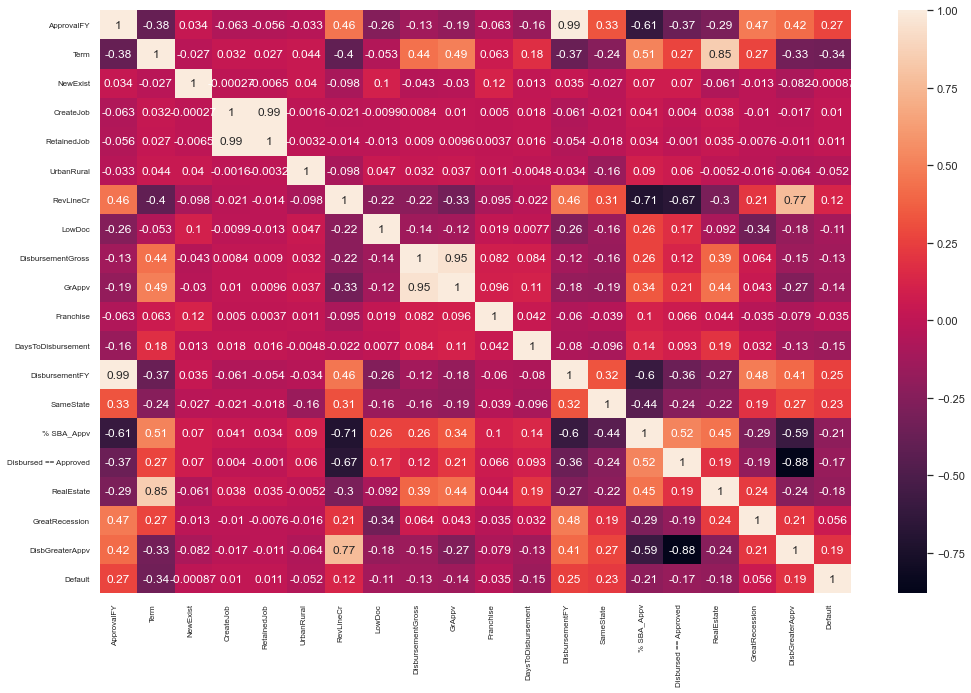

In [404]:
# Correlation Matrix
fig, ax = plt.subplots(figsize = (15, 10))
correlation_matrix = merged_df[['ApprovalFY', 'Term', 'NewExist', 'CreateJob', 
                               'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'GrAppv', 
                               'Franchise', 'DaysToDisbursement', 'DisbursementFY', 'SameState', '% SBA_Appv', 
                               'Disbursed == Approved', 'RealEstate', 'GreatRecession', 'DisbGreaterAppv', 
                               'Default']].corr()

ax = sns.heatmap(correlation_matrix, annot = True)
plt.xticks(rotation = 90, horizontalalignment = 'right', fontsize=8)
plt.yticks(fontsize = 8)
plt.show()

Let's create some meaningful visualizations to aid our analysis

Some of the plots that come to mind based on the feature engineering done previously are as follows:
 - Distrubution of Loans among New and Existing Business
 - Total/Average disbursed loan amount v/s Industry
 - Average days to disbursement  v/s Industry
 - Number of paid in full and defaulted loans v/s Industry
 - Number of paid in full and defaulted loans v/s DisbursementFY
 - Number of paid in full and defaulted loans v/s State
 - Percentage of defaulted loans backed by Real Estate
 - Percentage of defaulted loans active during the Great Recession

##### Distribution of Loans among New and Existing Businesses

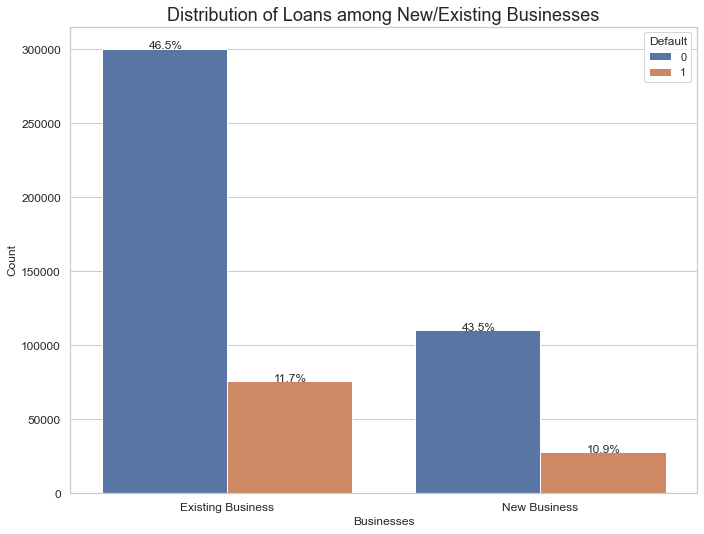

In [405]:
# Functions to add percentages on top of the bars
def bar_pct1(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j * Number_of_categories + i)]/total)
            x = patch[(j * Number_of_categories + i)].get_x() + patch[(j * Number_of_categories + i)].get_width() / 2 - 0.05
            y = patch[(j * Number_of_categories + i)].get_y() + patch[(j * Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
            
def bar_pct2(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().sort_values().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j * Number_of_categories + i)]/total)
            x = patch[(j * Number_of_categories + i)].get_x() + patch[(j * Number_of_categories + i)].get_width() / 2 - 0.05
            y = patch[(j * Number_of_categories + i)].get_y() + patch[(j * Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

# Plotting Distrubution of Loans among New and Existing Business
plt.figure(figsize = (10, 8))
plot1 = sns.countplot(x = 'NewExist', hue = 'Default', data = merged_df)
labels = ('Existing Business', 'New Business')
positions = (0, 1)
plt.xticks(positions, labels, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Businesses', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution of Loans among New/Existing Businesses', fontsize = 18)

bar_pct1(plot1, loans['NewExist'], 2, 2)

As mentioned earlier, approximately 73% of the businesses are existing businesses and among them 11.7% of the businesses had their loans defaulted in the time frame of the dataset. Looking at new businesses, approximately 27% of businesses are new businesses and among them 10.9% of the businesses had their loans defaulted

##### Total/Average disbursed loan amount v/s Industry

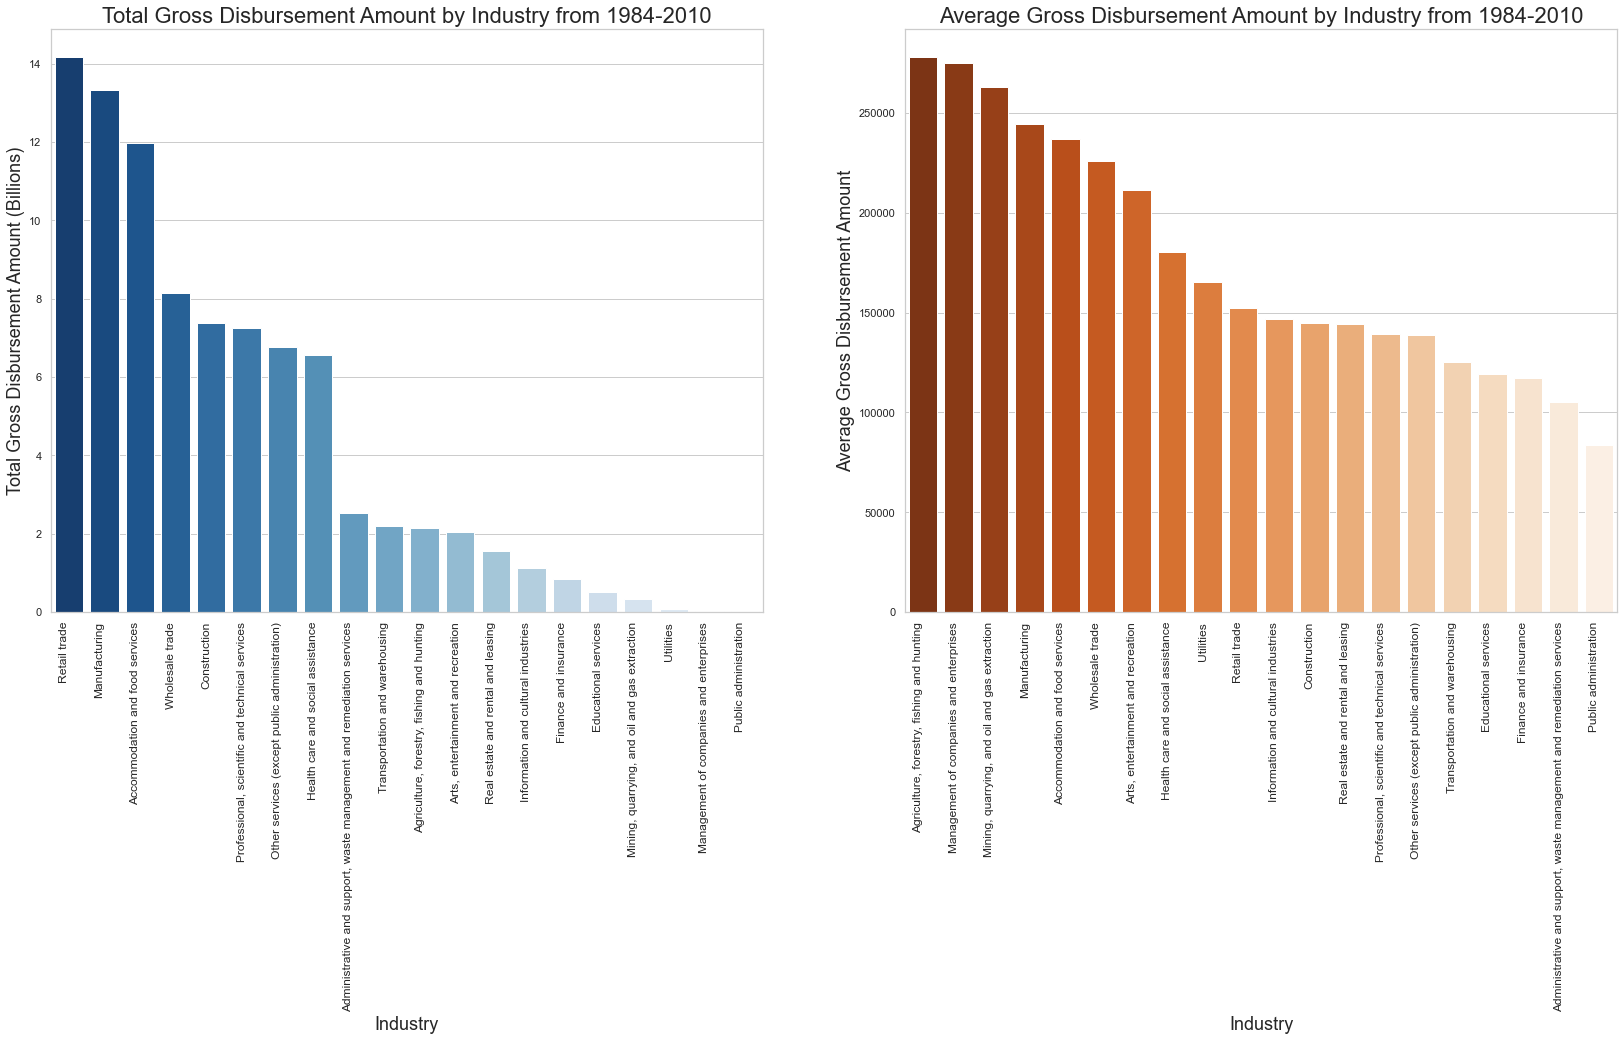

In [406]:
# Grouping by Industry and looking at the Total and Average Gross Disbursement Amount
IndustryTotal = merged_df.groupby(['Industry']).sum().sort_values('DisbursementGross', ascending=False)
IndustryMean = merged_df.groupby(['Industry']).mean().sort_values('DisbursementGross', ascending=False)

# Plotting Barplots for Total & Average Gross Disbursement Amount by Industries
fig, ax = plt.subplots(1, 2, figsize = (25, 10))

# Barplot 1 = Toatl Gross Disbursement Amount by Industry
plot2_1 = sns.barplot(IndustryTotal.index, IndustryTotal['DisbursementGross'] / (10 ** 9), palette = 'Blues_r', 
                      ax = ax[0])
ax[0].set_xticklabels(IndustryTotal.index, rotation = 90, horizontalalignment = 'right', fontsize = 12)
ax[0].set_title('Total Gross Disbursement Amount by Industry from 1984-2010', fontsize = 22)
ax[0].set_xlabel('Industry', fontsize = 18)
ax[0].set_ylabel('Total Gross Disbursement Amount (Billions)', fontsize = 18)

# Barplot 2 = Average Gross Disbursement Amount by Industry
plot2_2 = sns.barplot(IndustryMean.index, IndustryMean['DisbursementGross'], palette = 'Oranges_r', ax = ax[1])
ax[1].set_xticklabels(IndustryMean.index, rotation = 90, horizontalalignment = 'right', fontsize = 12)
ax[1].set_title('Average Gross Disbursement Amount by Industry from 1984-2010', fontsize = 22)
ax[1].set_xlabel('Industry', fontsize = 18)
ax[1].set_ylabel('Average Gross Disbursement Amount', fontsize =18)

plt.show()

 - 'Retail Trade' and 'Manufacturing' Industries have relatively large amounts of loan funds disbursed to them during the time frame in comparision to other Industries
 - First plot shows that the Industries associated to 'Agriculture, forestry, fishing and hunting', 'Mining, quarrying, and oil and gas extraction' and 'Management of Companies and Enterprises' have relatively small amounts of Total loan funds disbursed to them but according to the second plot these industries have the highest average loan amount compared to other industries, this indicates they had a small number of  very large loans

##### Average Days to Disbursement v/s Industry

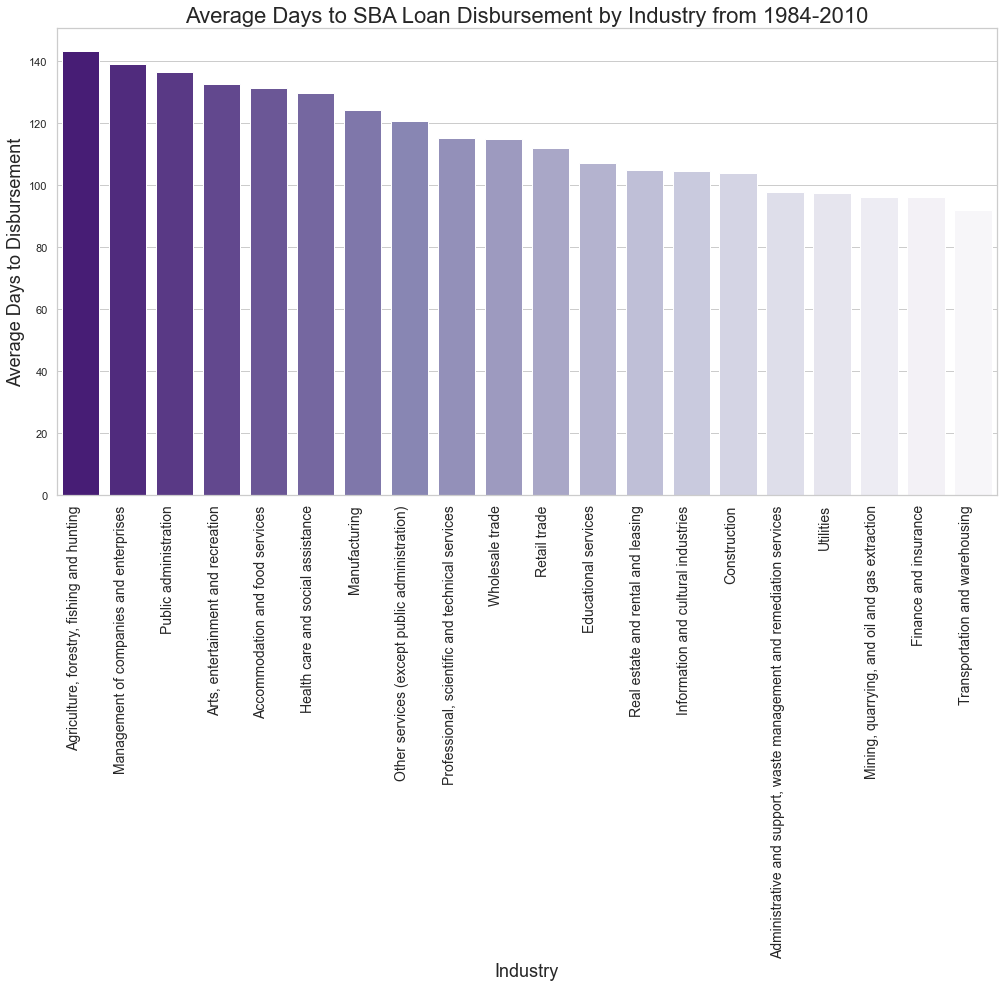

In [407]:
# Plotting Barplot for Average Days to Disbursement v/s Industry from 1984-2010
plt.figure(figsize = (15, 8))
plot3 = sns.barplot(x = IndustryMean.index, y = IndustryMean['DaysToDisbursement'].sort_values(ascending = False), 
                    palette = 'Purples_r')
plot3.set_xticklabels(IndustryMean['DaysToDisbursement'].sort_values(ascending=False).index, 
                      rotation = 90, horizontalalignment='right', fontsize = 14)
plot3.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize = 22)
plot3.set_xlabel('Industry', fontsize = 18)
plot3.set_ylabel('Average Days to Disbursement', fontsize = 18)
plt.show()

 - It seems that it took relatively longer to disburse loan funds to industries associated with 'Agriculture, forestry, fishing and hunting' and 'Mining, quarrying, and oil and gas extraction' sectors which justifies the previous assumption that they had a small number of very large loans, since loan application with a large amount are usually slow to process

##### Number of paid in full and defaulted loans v/s Industry

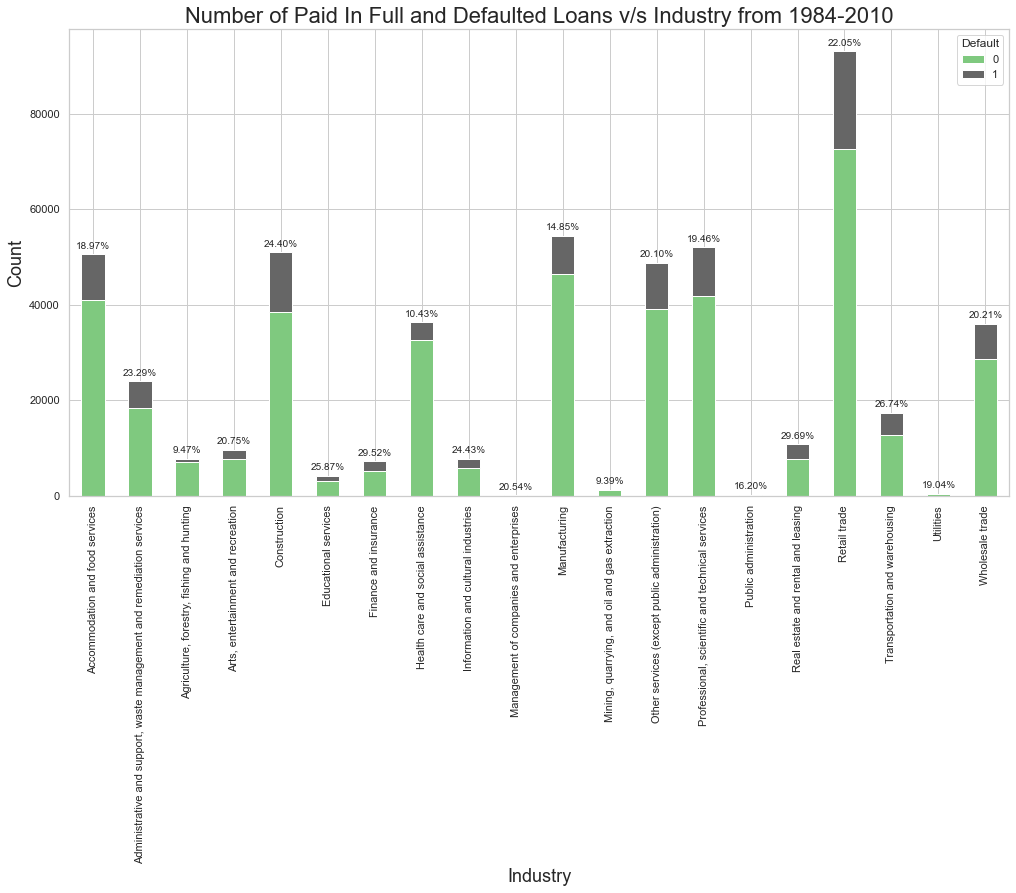

In [408]:
# Grouping by 'Default' and 'Industry' to plot a stacked barplot showing the distribution of loans
IndustryDefault = merged_df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')

# Calculating Default Rate for each Industry
Default_Pct = list((IndustryDefault[1] / (IndustryDefault[1] + IndustryDefault[0])) * 100)

# Plotting the stacked barplot
plot4 = IndustryDefault.plot(kind = 'bar', stacked = True, colormap = 'Accent', figsize = (15, 8))

# Annotating the Default Rate on top of all the bars
xy = []
for bar in plot4.patches:
    xy.append((bar.get_x() + bar.get_width() / 2, bar.get_height()))

xy = np.array(xy)
xy = xy[0:20, :] + xy[20:40, :]
xy[:, 0] = xy[:, 0] / 2
    
for i in range(len(Default_Pct)):
    plot4.annotate(str(format(Default_Pct[i], '.2f'))+'%', xy[i], ha = 'center', va = 'center', 
                   size = 10, xytext = (0, 8), textcoords = 'offset points')

plt.title('Number of Paid In Full and Defaulted Loans v/s Industry from 1984-2010', fontsize = 22)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Industry', fontsize = 18)
plt.show()

 - Industries with the highest number of loans during the time frame: Retail trade, Professional, scientific and technical services and Construction
 - Industries with the highest Default Rate: Finance and Insurance (29.52%), Real Estate and rental leasing (29.69%) and Transportation and warehousing (26.74%)

##### Number of Paid In Full and Defaulted loans by State

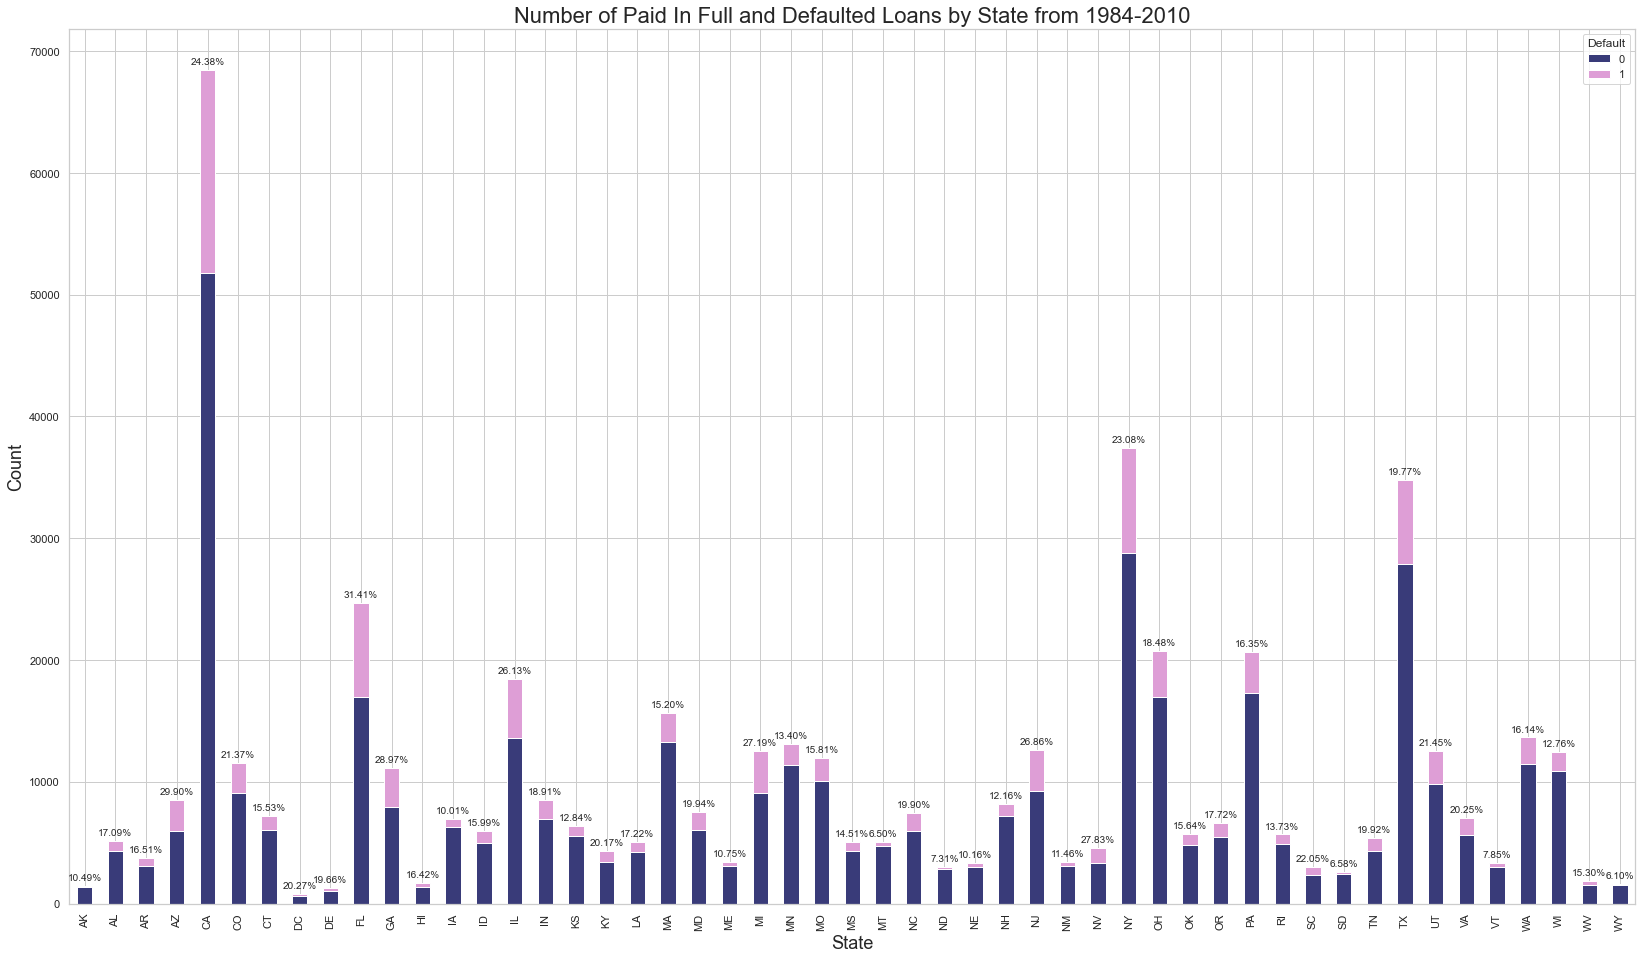

In [409]:
# Grouping by 'Default' and 'State' to plot a stacked barplot showing the distribution of loans
StateDefault = merged_df.groupby(['State', 'Default'])['State'].count().unstack('Default')

# Calculating Default Rate for each State
Default_Pct = list((StateDefault[1] / (StateDefault[1] + StateDefault[0])) * 100)

# Plotting the stacked barplot
plot5 = StateDefault.plot(kind = 'bar', stacked = True, colormap = 'tab20b', figsize = (25, 15))

# Annotating the Default Rate on top of all the bars
xy = []
for bar in plot5.patches:
    xy.append((bar.get_x() + bar.get_width() / 2, bar.get_height()))

xy = np.array(xy)
xy = xy[0:51, :] + xy[51:102, :]
xy[:, 0] = xy[:, 0] / 2
    
for i in range(len(Default_Pct)):
    plot5.annotate(str(format(Default_Pct[i], '.2f'))+'%', xy[i], ha = 'center', va = 'center', 
                   size = 10, xytext = (0, 8), textcoords = 'offset points')

plt.title('Number of Paid In Full and Defaulted Loans by State from 1984-2010', fontsize = 22)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('State', fontsize = 18)
plt.show()

In [410]:
pip install plotly-express

Note: you may need to restart the kernel to use updated packages.


In [411]:
# Chloropleth Map for loan density across states
import plotly.express as px

StateDefault['Total'] = StateDefault[0] +  StateDefault[1]
plot6 = px.choropleth(StateDefault, locations = StateDefault.index, locationmode = "USA-states", scope = "usa", 
                      color = 'Total', color_continuous_scale = "Viridis_r")

plot6.update_layout(title_text = 'States shaded by # of loans disbursed from 1984-2010',
                    title_font_family = "Times New Roman",
                    title_font_size = 22,
                    title_font_color = "black", 
                    title_x = 0.45)

plot6.show()

In [412]:
# Chloropleth Map for Default Rate across States
StateDefault['Default Rate %'] = (StateDefault[1] /  StateDefault['Total']) * 100
plot6 = px.choropleth(StateDefault, locations = StateDefault.index, locationmode = 'USA-states', scope = 'usa', 
                      color = 'Default Rate %', color_continuous_scale = 'rdbu_r')

plot6.update_layout(title_text = 'States shaded by Default Rates(%) disbursed from 1984-2010',
                    title_font_family = 'Times New Roman',
                    title_font_size = 22,
                    title_font_color = 'black', 
                    title_x = 0.45)
plot6.show()

 - States with the highest number of loans during sample period: California (68,422), New York (37,427) and Texas (34,777)
 - State with the highest Default Rate: Florida (31.4%), Arizona (29.9%) and Nevada (27.8%)

##### Number of paid in full and defaulted loans v/s DisbursementFY

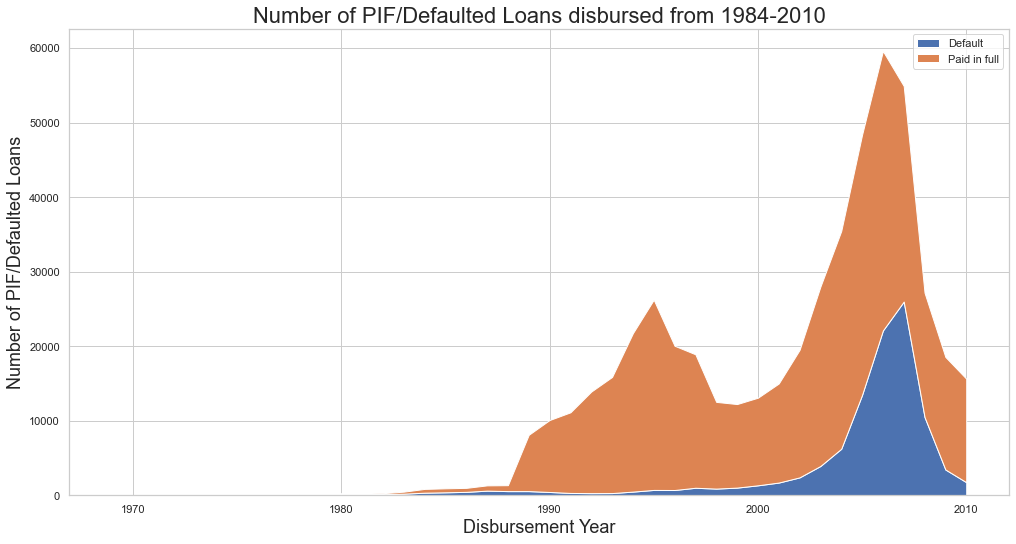

In [413]:
# Grouping by 'DisbursementFY' and 'Default'
StackedData = merged_df.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')

x = StackedData.index
y = [StackedData[1], StackedData[0]]

plt.figure(figsize = (15, 8))

plot7 = plt.stackplot(x, y, labels = ['Default', 'Paid in full'])

plt.title('Number of PIF/Defaulted Loans disbursed from 1984-2010', fontsize = 22)
plt.xlabel('Disbursement Year', fontsize = 18)
plt.ylabel('Number of PIF/Defaulted Loans', fontsize = 18)
plt.legend(loc = 'best')
plt.show()

There is a clear increase in loan volume leading up to the peak of the Great Recession, with a subsequent drop in loan volume immediately following that time. Looking at the graph, it appears the default rate of loans increased during that time as well.

##### Percentage of defaulted loans backed by 'Real Estate' & Percentage of defaulted loans active during the 'Great Recession'

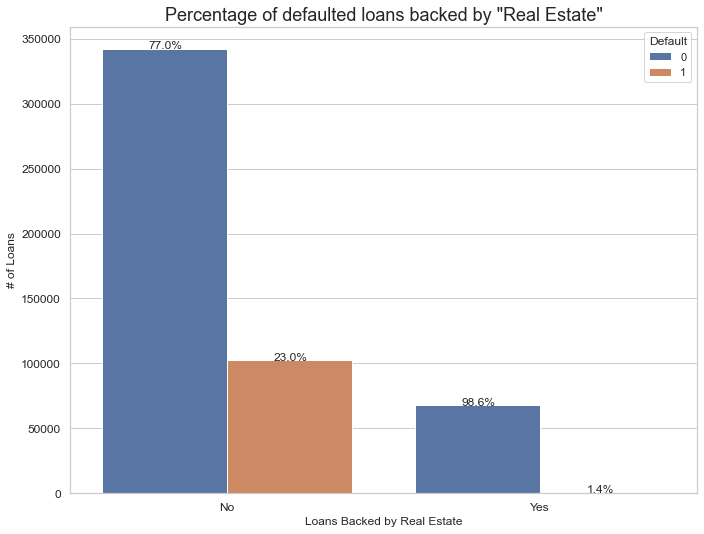

In [414]:
# Plotting Distrubution of Loans backed by Real Estate
plt.figure(figsize = (10, 8))
plot8 = sns.countplot(x = 'RealEstate', hue = 'Default', data = merged_df)
labels = ('No', 'Yes')
positions = (0, 1)
plt.xticks(positions, labels, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Loans Backed by Real Estate', fontsize = 12)
plt.ylabel('# of Loans', fontsize = 12)
plt.title('Percentage of defaulted loans backed by "Real Estate"', fontsize = 18)

bar_pct1(plot8, merged_df['RealEstate'], 2, 2)

The volume of loans backed by real estate was much less than those not backed by real estate which makes sense that most people aren't willing to take on that much risk, however the default rate is also much less for loans backed by real estate  (1.4%). This is likely because the people and businesses who have their loans backed by real estate are much more established players so they're more willing to do what it takes to pay the debt.

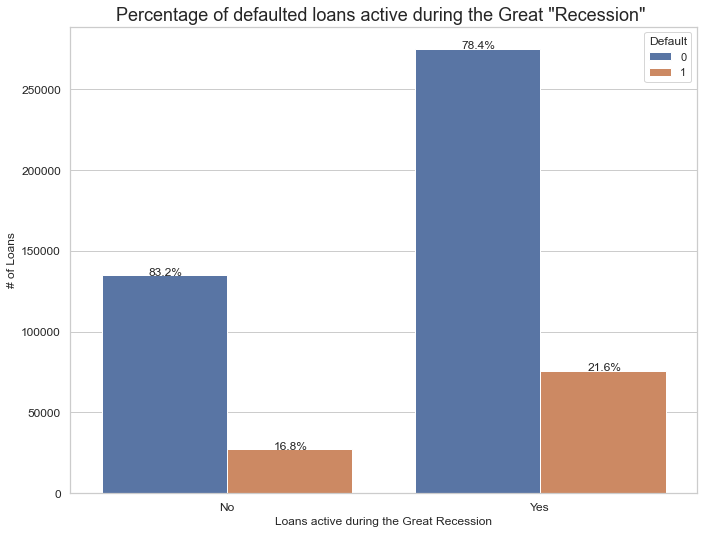

In [415]:
# Plotting Loans active during the Great Recession
plt.figure(figsize = (10, 8))
plot9 = sns.countplot(x = 'GreatRecession', hue = 'Default', data = merged_df)
labels = ('No', 'Yes')
positions = (0, 1)
plt.xticks(positions, labels, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Loans active during the Great Recession', fontsize = 12)
plt.ylabel('# of Loans', fontsize = 12)
plt.title('Percentage of defaulted loans active during the Great "Recession" ', fontsize = 18)

bar_pct2(plot9, merged_df['GreatRecession'], 2, 2)

The assumption was that loans active during the Great Recession would have a noticeably higher Default Rate than those not active during that time. After looking at this plot it seems that this difference would be more apparent if the focus was on loans disbursed in the few years leading up to the Great Recession, maybe beginning in 2004 or 2005

Let's checkout the features and their data types so far

In [416]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [417]:
# Checking Class Imbalance
merged_df['Default'].value_counts()

0    410085
1    103274
Name: Default, dtype: int64

In [418]:
state_income = pd.read_csv('state_income_clean.csv', low_memory=False)
state_code = pd.read_csv('state_codes.csv', low_memory=False)
state_income.head()
state_code.head()

In [421]:
#process state income and codes and add to existing SBA_Loans DF
def process_state_income(income_DF, states_DF):
    income_DF = income_DF.rename(columns = {'State' : 'Name'})
    states_income = pd.merge(income_DF, states_DF, on = 'Name').rename(
        columns = {'Code' : 'State',
                   'Date' : 'ApprovalFY',
                   'Income' : 'Average_State_Income'
                  }).drop('Name', 1)
    states_income['ApprovalFY'] = states_income['ApprovalFY'].astype(str)

    return states_income

In [422]:
state_income_code = process_state_income(state_income, state_code)

In [423]:
state_income_code

,ApprovalFY,Average_State_Income,Factored Mean Income,State
0,2018,49936,0.790389,AL
1,2017,51113,0.832839,AL
2,2016,47221,0.799827,AL
3,2015,44509,0.787547,AL
4,2014,42278,0.787931,AL
...,...,...,...,...
1745,1988,26419,0.970395,WY
1746,1987,27590,1.058670,WY
1747,1986,23559,0.946259,WY
1748,1985,22081,0.934923,WY


### Total Average Income by Year (US)

## Incorporating Federal Election Result

In [424]:
federal_election_df = pd.read_csv('US_President.csv')

In [425]:
federal_election_df['start date'] = pd.to_datetime(federal_election_df['From'])
federal_election_df['end date'] = pd.to_datetime(federal_election_df['To'],errors='coerce')  # the last end date is current, which is a string, replace it with NAT
federal_election_df['end date'] = federal_election_df['end date'].fillna(pd.to_datetime('2021-01-20'))  # Replace NAT with the googled last day of Trump's presidency term merged_df


In [426]:
#merge two dataframe based on ApprovalDate from df, and start date and end date from federal_election_df, add a new column to pd that is federal party in power when the loan was approved, run time is long, need to save a checkpoint
merged_df = merge_on_date(merged_df, federal_election_df, 'President Party','Party')

In [427]:
merged_df

,index,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,...,DaysToDisbursement,DisbursementFY,SameState,% SBA_Appv,Disbursed == Approved,RealEstate,GreatRecession,Default,DisbGreaterAppv,President Party
0,0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,...,730,1999,1,80.0,1,0,0,0,0,Democratic
1,1,1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,...,92,1997,0,80.0,1,0,0,0,0,Democratic
2,2,2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,...,306,1997,0,75.0,1,0,1,0,0,Democratic
3,3,5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,...,122,1997,1,75.0,1,0,1,0,0,Democratic
4,4,7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,...,487,1998,1,80.0,1,0,0,0,0,Democratic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531819,793796,885624,9702953008,ROCKY MOUNTAIN COMPUTERS,COMMERCE CITY,CO,80002,BANK OF THE WEST,CO,0,...,580,1998,0,80.0,1,0,0,0,0,Democratic
531820,793797,885643,9704023004,"THE DUVALL INN, INC.",LEWISTOWN,MT,59457,WELLS FARGO BANK NATL ASSOC,SD,0,...,790,1998,1,75.0,1,0,1,0,0,Democratic
531821,793798,886451,9721213004,MISTER BAGEL OF CAPE COD,HYANNIS,MA,2601,BANK OF AMERICA NATL ASSOC,RI,0,...,91,1997,1,75.0,0,0,0,1,0,Democratic
531822,793799,890560,9817643009,REPOSE MASSAGE THERAPY,BOSTON,MA,2109,CAMBRIDGE TRUST COMPANY,MA,0,...,115,1997,0,80.0,1,0,0,0,0,Democratic


Save a check point

In [428]:
merged_df.to_csv('df_with_party.csv')

In [429]:
merged_df = pd.read_csv('df_with_party.csv')

In [430]:
merged_df['SBA_backed_portion'] = merged_df['SBA_Appv']/merged_df['GrAppv']
merged_df['Republican'] = [1 if x == 'Republican' else 0 for x in merged_df['President Party']]
merged_df

,Unnamed: 0,index,Unnamed: 0.1,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,...,SameState,% SBA_Appv,Disbursed == Approved,RealEstate,GreatRecession,Default,DisbGreaterAppv,President Party,SBA_backed_portion,Republican
0,0,0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,...,1,80.0,1,0,0,0,0,Democratic,0.80,0
1,1,1,1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,...,0,80.0,1,0,0,0,0,Democratic,0.80,0
2,2,2,2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,...,0,75.0,1,0,1,0,0,Democratic,0.75,0
3,3,3,5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,...,1,75.0,1,0,1,0,0,Democratic,0.75,0
4,4,4,7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,...,1,80.0,1,0,0,0,0,Democratic,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513354,531819,793796,885624,9702953008,ROCKY MOUNTAIN COMPUTERS,COMMERCE CITY,CO,80002,BANK OF THE WEST,CO,...,0,80.0,1,0,0,0,0,Democratic,0.80,0
513355,531820,793797,885643,9704023004,"THE DUVALL INN, INC.",LEWISTOWN,MT,59457,WELLS FARGO BANK NATL ASSOC,SD,...,1,75.0,1,0,1,0,0,Democratic,0.75,0
513356,531821,793798,886451,9721213004,MISTER BAGEL OF CAPE COD,HYANNIS,MA,2601,BANK OF AMERICA NATL ASSOC,RI,...,1,75.0,0,0,0,1,0,Democratic,0.75,0
513357,531822,793799,890560,9817643009,REPOSE MASSAGE THERAPY,BOSTON,MA,2109,CAMBRIDGE TRUST COMPANY,MA,...,0,80.0,1,0,0,0,0,Democratic,0.80,0


Democratic vs Republican For Backing Urban and Rural Businesses

In [431]:
grouped_by_party_urbanrural = merged_df.groupby(['President Party', 'UrbanRural']).agg({'SBA_backed_portion': ['mean', 'min', 'max','count']})
df_for_graph = grouped_by_party_urbanrural['SBA_backed_portion']
df_for_graph = df_for_graph.reset_index()
df_for_graph = df_for_graph[df_for_graph['UrbanRural'] != 0]
df_for_graph['UrbanRural'] = df_for_graph['UrbanRural'].apply(lambda x: 'Urban' if x == 1 else 'Rural')


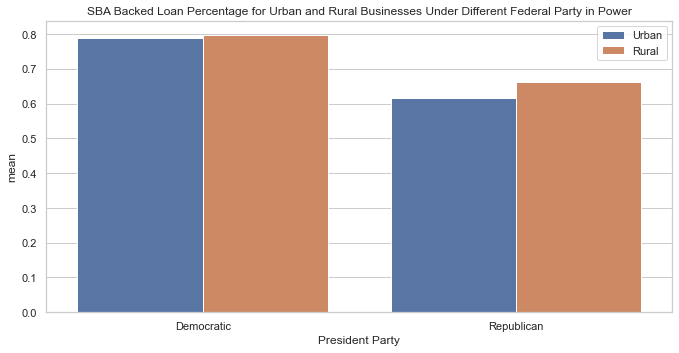

In [432]:
plt.figure(figsize=(10,5))
plt.title('SBA Backed Loan Percentage for Urban and Rural Businesses Under Different Federal Party in Power')
ax = sns.barplot(x = 'President Party',y = 'mean',data = df_for_graph, hue = 'UrbanRural')
ax.legend()
plt.show()

Not too much difference between urban and rural business for either democratic or republican. Analyze the trend by state. Choose Florida (swing state) and Texas (Republican since 70s)

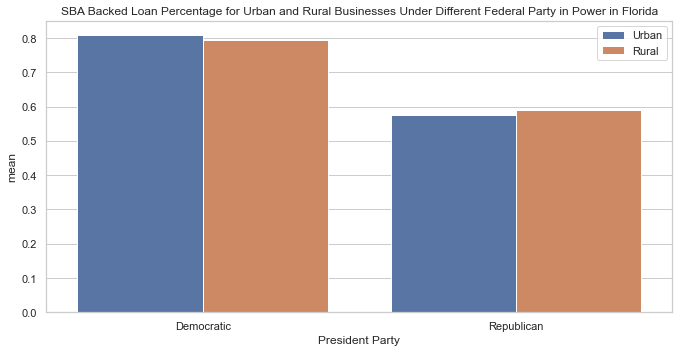

,President Party,UrbanRural,mean,min,max,count
0,Democratic,Urban,0.809960,0.25862,1.0,5426
1,Democratic,Rural,0.794134,0.30000,1.0,552
2,Republican,Urban,0.573881,0.23000,1.0,16058
3,Republican,Rural,0.590212,0.50000,1.0,2657


In [433]:
FL_df = merged_df[merged_df['State'] == 'FL']
grouped_by_party_urbanrural_FL = FL_df.groupby(['President Party', 'UrbanRural']).agg({'SBA_backed_portion': ['mean', 'min', 'max','count']})
df_for_graph_FL = grouped_by_party_urbanrural_FL['SBA_backed_portion']
df_for_graph_FL = df_for_graph_FL.reset_index()
df_for_graph_FL = df_for_graph_FL[df_for_graph_FL['UrbanRural'] != 0]
df_for_graph_FL['UrbanRural'] = df_for_graph_FL['UrbanRural'].apply(lambda x: 'Urban' if x == 1 else 'Rural')

plt.figure(figsize=(10,5))
plt.title('SBA Backed Loan Percentage for Urban and Rural Businesses Under Different Federal Party in Power in Florida')
ax = sns.barplot(x = 'President Party',y = 'mean',data = df_for_graph_FL, hue = 'UrbanRural')
ax.legend()
plt.show()
df_for_graph_FL

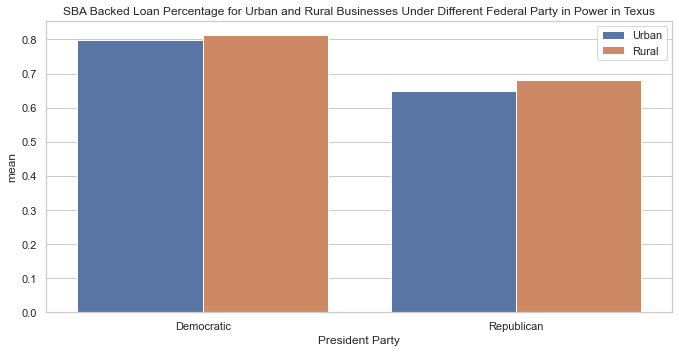

,President Party,UrbanRural,mean,min,max,count
0,Democratic,Urban,0.796926,0.079991,1.0,10620
1,Democratic,Rural,0.814231,0.370000,1.0,1678
2,Republican,Urban,0.647587,0.110000,1.0,19895
3,Republican,Rural,0.681471,0.310000,1.0,2584


In [434]:
TX_df = merged_df[merged_df['State'] == 'TX']
grouped_by_party_urbanrural_TX = TX_df.groupby(['President Party', 'UrbanRural']).agg({'SBA_backed_portion': ['mean', 'min', 'max','count']})
df_for_graph_TX = grouped_by_party_urbanrural_TX['SBA_backed_portion']
df_for_graph_TX = df_for_graph_TX.reset_index()
df_for_graph_TX = df_for_graph_TX[df_for_graph_TX['UrbanRural'] != 0]
df_for_graph_TX['UrbanRural'] = df_for_graph_TX['UrbanRural'].apply(lambda x: 'Urban' if x == 1 else 'Rural')

plt.figure(figsize=(10,5))
plt.title('SBA Backed Loan Percentage for Urban and Rural Businesses Under Different Federal Party in Power in Texus')
ax = sns.barplot(x = 'President Party',y = 'mean',data = df_for_graph_TX, hue = 'UrbanRural')
ax.legend()
plt.show()
df_for_graph_TX

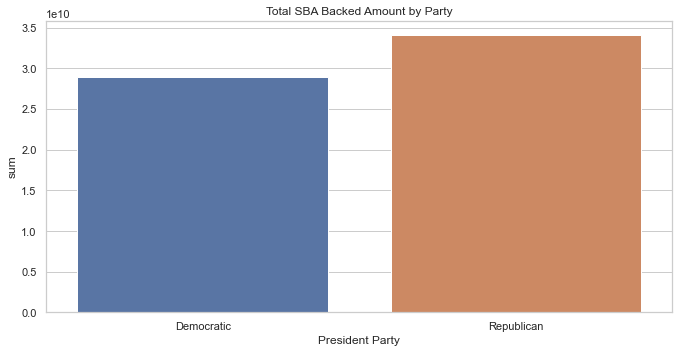

,President Party,mean,sum,count
0,Democratic,169934.284715,2.891772e+10,170170
1,Republican,99484.651635,3.414204e+10,343189


In [435]:
grouped_by_party_totalSBA = merged_df.groupby(['President Party']).agg({'SBA_Appv': ['mean', 'sum','count']})
df_for_graph_totalSBA = grouped_by_party_totalSBA['SBA_Appv']
df_for_graph_totalSBA = df_for_graph_totalSBA.reset_index()

plt.figure(figsize=(10,5))
plt.title('Total SBA Backed Amount by Party')
ax = sns.barplot(x = 'President Party',y = 'sum',data = df_for_graph_totalSBA)
plt.show()
df_for_graph_totalSBA

Looks like republican have more funding for supporting small businesses, however, this is not normalized to year or accounting for inflation and macroeconomics. Lastly, I want to analyze the industry receiving the most funding under each political party.

In [436]:
df_republican = merged_df[merged_df['President Party'] == 'Republican']
df_democratic = merged_df[merged_df['President Party'] == 'Democratic']

df_republican_by_Industry = df_republican.groupby('Industry').sum()['SBA_Appv']
df_democratic_by_Industry = df_democratic.groupby('Industry').sum()['SBA_Appv']

In [437]:
df_groupby_industry_and_party = merged_df.groupby(['President Party', 'Industry']).agg({'SBA_backed_portion': ['mean','count'],'SBA_Appv':'sum'})
df_groupby_industry_and_party = df_groupby_industry_and_party.reset_index()
#Choose 8 industry to show in the graph
chosen_industry = ['Accommodation and food services','Construction','Educational services','Finance and insurance','Manufacturing','Retail trade','Real estate and rental and leasing','Mining, quarrying, and oil and gas extraction']
df_groupby_industry_and_party = df_groupby_industry_and_party[df_groupby_industry_and_party['Industry'].isin(chosen_industry)]
df_groupby_industry_and_party['Industry'] = df_groupby_industry_and_party['Industry'].apply(lambda x: 'Mining' if x == 'Mining, quarrying, and oil and gas extraction' else x).apply(lambda x: 'Real estate' if x == 'Real estate and rental and leasing' else x)
df_groupby_industry_and_party

President Party                         Industry SBA_backed_portion         \
                                                                  mean  count   
0       Democratic  Accommodation and food services           0.809891  18998   
4       Democratic                     Construction           0.759592  15055   
5       Democratic             Educational services           0.770508    857   
6       Democratic            Finance and insurance           0.762495   1637   
10      Democratic                    Manufacturing           0.809959  20954   
11      Democratic                           Mining           0.780515    539   
15      Democratic                      Real estate           0.805304   2650   
16      Democratic                     Retail trade           0.799576  31880   
20      Republican  Accommodation and food services           0.678121  31591   
24      Republican                     Construction           0.579227  35977   
25      Republican             Educational services           0.591856   3391   
26      Republican            Finance and insurance           0.572322   5602   
30      Republican                    Manufacturing           0.673424  33510   
31      Republican                           Mining           0.679306    717   
35      Republican                      Real estate           0.588593   8213   
36      Republican                     Retail trade           0.638142  61223   

        SBA_Appv  
             sum  
0   4.348743e+09  
4   1.884423e+09  
5   1.203625e+08  
6   2.055578e+08  
10  4.704072e+09  
11  1.145923e+08  
15  4.652225e+08  
16  4.529091e+09  
20  5.041577e+09  
24  2.431895e+09  
25  2.128346e+08  
26  3.046904e+08  
30  5.266124e+09  
31  1.243119e+08  
35  5.788390e+08  
36  5.700435e+09

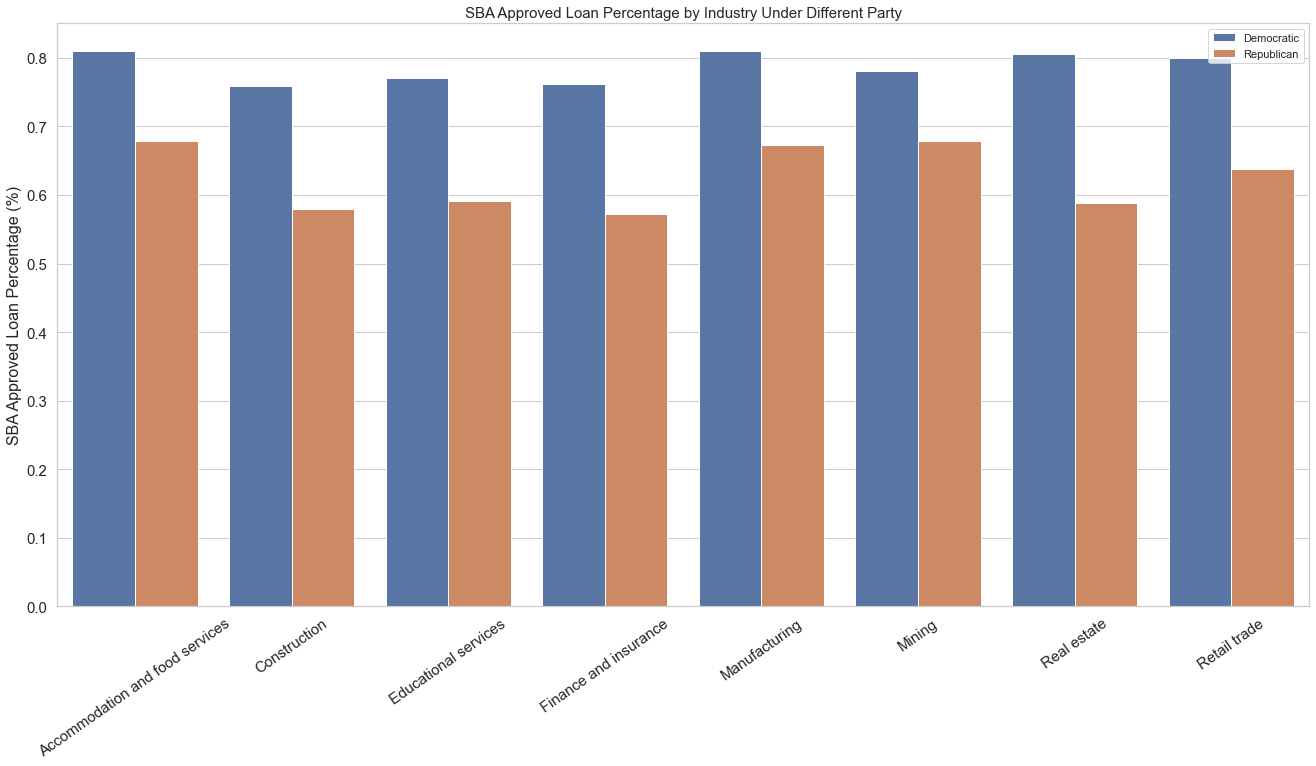

In [438]:
plt.figure(figsize=(20,10))
plt.title('SBA Approved Loan Percentage by Industry Under Different Party',fontsize = 15)
y = df_groupby_industry_and_party['SBA_backed_portion']['mean']
ax3 = sns.barplot(x = 'Industry',y = y,data = df_groupby_industry_and_party, hue = 'President Party')
plt.xlabel('', fontsize=15)
plt.ylabel('SBA Approved Loan Percentage (%)', fontsize=16)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
ax3.legend()
plt.xticks(rotation = 35)
plt.show()

Text(0, 0.5, 'SBA Backed Loan Percentage (%)')

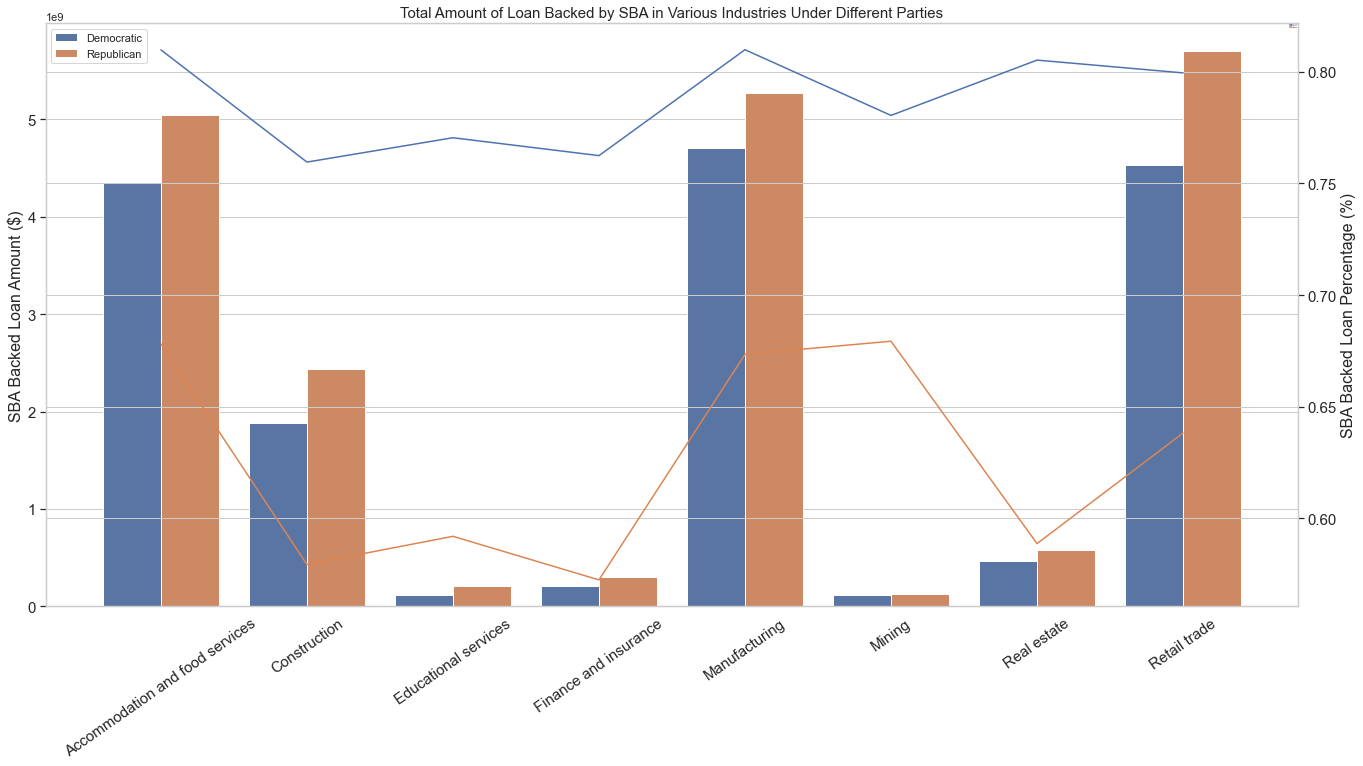

In [439]:
plt.figure(figsize=(20,10))
plt.title('Total Amount of Loan Backed by SBA in Various Industries Under Different Parties', fontsize = 15)
y = df_groupby_industry_and_party['SBA_Appv']['sum']
ax3 = sns.barplot(x = 'Industry',y = y,data = df_groupby_industry_and_party, hue = 'President Party')
plt.xlabel('', fontsize=15)
plt.ylabel('SBA Backed Loan Amount ($)', fontsize=16)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
ax3.legend()
plt.xticks(rotation = 35)

y2 = df_groupby_industry_and_party['SBA_backed_portion']['mean']
ax3 = plt.twinx()
sns.lineplot(data=df_groupby_industry_and_party, x = 'Industry', y = y2, color="r", ax=ax3 ,hue = 'President Party')
plt.yticks(fontsize= 15)
ax3.legend(fontsize= 0)
plt.ylabel('SBA Backed Loan Percentage (%)', fontsize=16)

## Correlating State Income and Inflation

## Unemployment Rate

In [91]:
#Step 1. Analyze annual Unemployment data in US
unemployment_df = pd.read_csv('Unemployment.csv')
unemployment_df['year'] = unemployment_df['DATE'].astype(str).str[0:4]
Annual_unemployment_rate = unemployment_df.groupby('year').agg({'UNRATE': ['mean']})['UNRATE'].reset_index() #Aggregate into annual unemployment data
Annual_unemployment_rate['year'] = Annual_unemployment_rate['year'].astype(float)

In [92]:
print(Annual_unemployment_rate.info())

merged_df['ApprovalFY'] = merged_df['ApprovalFY'].astype(float)
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    75 non-null     float64
 1   mean    75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513359 entries, 0 to 513358
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             513359 non-null  int64  
 1   index                  513359 non-null  int64  
 2   Unnamed: 0.1           513359 non-null  int64  
 3   LoanNr_ChkDgt          513359 non-null  int64  
 4   Name                   513353 non-null  object 
 5   City                   513348 non-null  object 
 6   State                  513350 non-null  object 
 7   Zip                    513359 non-null  int64  
 8   Bank                   512346 non-null  object 
 9   BankSt

In [93]:
#Step 2 merge the unemployment data to df
merged_with_unemployment = merged_df.merge(Annual_unemployment_rate, how='left', left_on = 'ApprovalFY', right_on = 'year')
merged_with_unemployment = merged_with_unemployment.drop(['year','Republican'], axis=1)
merged_with_unemployment['ApprovalFY'] = merged_with_unemployment['ApprovalFY'].astype(int)
merged_with_unemployment = merged_with_unemployment.rename({'mean':'Unemployment'}, axis='columns')

In [94]:
grouped_by_year = merged_with_unemployment.groupby(['ApprovalFY']).agg('mean').reset_index()
grouped_by_year = grouped_by_year[['SBA_backed_portion','ApprovalFY','Unemployment']]
grouped_by_year['SBA_backed_portion'] = grouped_by_year['SBA_backed_portion']*100

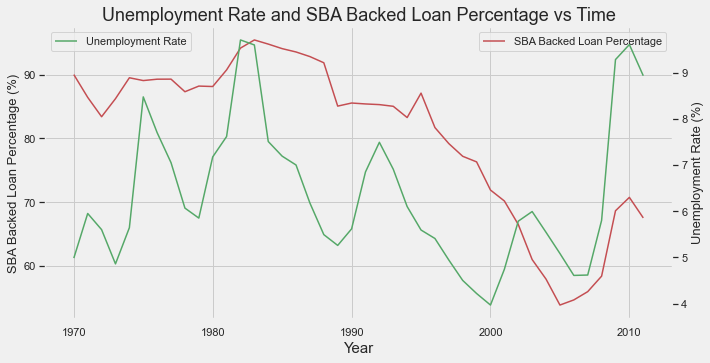

In [98]:
plt.figure(figsize=(10,5))
plt.title('Unemployment Rate and SBA Backed Loan Percentage vs Time',fontsize=18)

ax2 = sns.lineplot(data=grouped_by_year, x = 'ApprovalFY', y = 'SBA_backed_portion',color="r", label = 'SBA Backed Loan Percentage')
ax2.set_ylabel('SBA Backed Loan Percentage (%)',fontsize=13)
ax2.set_xlabel('Year',fontsize=15)
ax2 = plt.twinx()
sns.lineplot(data=grouped_by_year, x = 'ApprovalFY', y = 'Unemployment', color="g", ax=ax2 , label = 'Unemployment Rate')
ax2.set_ylabel('Unemployment Rate (%)',fontsize=13)
ax2.grid(False)
plt.savefig('Unemployment Rate and SBA Backed Loan Percentage vs Time.png')
plt.show()

In [96]:
# Saving a Check Point
merged_with_unemployment.to_csv('DataFrame_for_Modelling.csv')

In [24]:
Modelling_df = pd.read_csv('DataFrame_for_Modelling.csv')

### Modelling

In [25]:
Modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513359 entries, 0 to 513358
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             513359 non-null  int64  
 1   Unnamed: 0.1           513359 non-null  int64  
 2   index                  513359 non-null  int64  
 3   Unnamed: 0.1.1         513359 non-null  int64  
 4   LoanNr_ChkDgt          513359 non-null  int64  
 5   Name                   513353 non-null  object 
 6   City                   513348 non-null  object 
 7   State                  513350 non-null  object 
 8   Zip                    513359 non-null  int64  
 9   Bank                   512346 non-null  object 
 10  BankState              512341 non-null  object 
 11  NAICS                  513359 non-null  int64  
 12  ApprovalDate           513359 non-null  object 
 13  ApprovalFY             513359 non-null  int64  
 14  Term                   513359 non-nu

###### The Features that won't contribute towards the predictions are as follows:
 - 'LoanNr_ChkDgt' and 'Name' - provides no value to the actual analysis
 - 'City' and 'Zip' - each have a large number of unique values, and the assumption is that it is not likely either would have any particularly significant values
 - 'Bank' - Name of the bank shouldn't matter for analysis
 - 'ChgOffDate' - only applies when a loan is charged off and isn't relevant to the analysis
 - 'NAICS' - replaced by 'Industry'
 - 'FranchiseCode' - replaced by 'Franchise'
 - 'ApprovalDate' and 'DisbursementDate' - hypothesis that 'DaysToDisbursement' will be more valueable
 - 'ChgOffPrinGr' - not applicable if goal is to predict default or otherwise
 - 'SBA_Appv' - guaranteed amount is based on percentage of gross loan amount, not dollar amount typically. '% SBA_Appv' would work just fine
 - 'MIS_Status' - 'Default' replaces this as the target variable

In [26]:
# Dropping insignificant columns
Modelling_df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS',
                      'FranchiseCode', 'ApprovalDate', 'DisbursementDate', 'BalanceGross', 
                      'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace = True)

#Sanity Check
Modelling_df.isnull().sum()

index                       0
State                       9
BankState                1018
ApprovalFY                  0
Term                        0
NoEmp                       0
NewExist                    0
CreateJob                   0
RetainedJob                 0
UrbanRural                  0
RevLineCr                   0
LowDoc                      0
DisbursementGross           0
GrAppv                      0
Industry                    0
Franchise                   0
DaysToDisbursement          0
DisbursementFY              0
SameState                   0
% SBA_Appv                  0
Disbursed == Approved       0
RealEstate                  0
GreatRecession              0
Default                     0
DisbGreaterAppv             0
President Party             0
SBA_backed_portion          0
Unemployment                0
dtype: int64

In [27]:
Modelling_df.dropna(inplace = True)

In [28]:
Modelling_df.isnull().sum()

index                    0
State                    0
BankState                0
ApprovalFY               0
Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
UrbanRural               0
RevLineCr                0
LowDoc                   0
DisbursementGross        0
GrAppv                   0
Industry                 0
Franchise                0
DaysToDisbursement       0
DisbursementFY           0
SameState                0
% SBA_Appv               0
Disbursed == Approved    0
RealEstate               0
GreatRecession           0
Default                  0
DisbGreaterAppv          0
President Party          0
SBA_backed_portion       0
Unemployment             0
dtype: int64

First let's import necessary modules and libraries needed for modelling

In [29]:
# One-Hot Encoding Categorical Features
Modelling_df = pd.get_dummies(Modelling_df)

In [31]:
Modelling_df.shape

(512332, 149)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Next let's split our dataset in to training, validation and test sets

In [33]:
# Splitting the dataset
features = Modelling_df.drop(columns = ['Default'])
target = Modelling_df['Default']

# Splitting for Validation
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.15, random_state = 0)

print(Modelling_df.shape, '\n')
print(X_train.shape, y_train.shape, '\n')
print(X_val.shape, y_val.shape, '\n')

(512332, 149) 

(435482, 148) (435482,) 

(76850, 148) (76850,) 



##### Standardization
It's usually a good practice to <b>standardize</b> the training set then scale the validation and test sets according to the scalers used to standardize the training set, to prevent leakage

In [34]:
# Fitting StandardScaler to X_train then transforming X_train, X_val and X_test based on the scalers of X_train
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [35]:
# Converting train, val and test back to pandas DataFrames
X_train = pd.DataFrame(data = X_train, columns = features.columns)
X_val = pd.DataFrame(data = X_val, columns = features.columns)
X_test = pd.DataFrame(data = X_test, columns = features.columns)

After exploratory data analysis, let's experiment with modelling. Since, the task at hand is <b>binary classification</b>, the first model that comes to mind is a <b>Logistic Regression</b> model, so let's build a Logistic Regression Model

#### Logistic Regression

In [36]:
# Fitting LogisticRegression model to X_train
LogReg = LogisticRegression(random_state = 0).fit(X_train.to_numpy(), y_train.to_numpy().reshape(-1, 1))

# Predicting on X_train and X_val
y_train_pred = LogReg.predict(X_train.to_numpy())
y_val_pred = LogReg.predict(X_val.to_numpy())

In this analysis, it's better if it's predicted that a loan defaults and it doesn't than if it's predicted a loan will be paid in full and ends up in default. In other words, it is desired that the model minimizes the number of false negatives (since a 1 in the Default column signifies a 'positive' value in this case). Essentially a model that predicts the correct outcome most of the time, but when it gets it wrong it's not as bad. Hence, performance metrics like precision, recall, F1-score need to be considered, moreover the focus should be on maximizing recall as it is desired to minimize false negatives.

Precision attempts to answer what proportion of positive predictions was actually correct, whereas Recall attempts to answer what proportion of actual positives was predicted correctly. The F1-score is a weighted average of precision and recall. General accuracy therefore is better if the outcomes have similar costs, however F1-score should be relied on more heavily if the outcomes have different costs as is the case in this scenario. So let's checkout these metrics for the predictions made above

Training Accuracy:  0.8792900739869846
Training Precision Score:  0.778478693747511
Training Recall Score:  0.5583114360790586
Training F1-Score:  0.6502644622600712


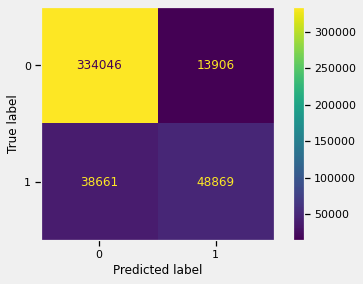

In [37]:
# Performance Metrics for the Training Set
print('Training Accuracy: ', accuracy_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training Precision Score: ', precision_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training Recall Score: ', recall_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training F1-Score: ', f1_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
plot10 = plot_confusion_matrix(LogReg, X_train.to_numpy(), y_train.to_numpy().reshape(-1, 1))
plt.grid(False)
plt.show()

Validation Accuracy:  0.8782823682498373
Validation Precision Score:  0.7851499371520919
Validation Recall Score:  0.5567935820705463
Validation F1-Score:  0.6515422440768887


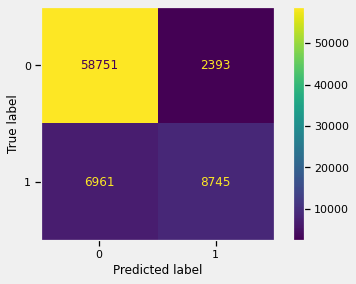

In [38]:
# Performance Metrics for the Validation Set
print('Validation Accuracy: ', accuracy_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation Precision Score: ', precision_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation Recall Score: ', recall_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation F1-Score: ', f1_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
plot11 = plot_confusion_matrix(LogReg, X_val.to_numpy(), y_val.to_numpy().reshape(-1, 1))
plt.grid(False)
plt.show()

Let's make a baseline model which predicts that every loan will default to set a standard for other models, later performance metrics of different models can be compared to this

In [39]:
# Creating three target arrays with only '1's with the same shape as y_train, y_val and y_test
y_train_base = np.ones(y_train.to_numpy().reshape(-1, 1).shape)
y_val_base = np.ones(y_val.to_numpy().reshape(-1, 1).shape)

# Performance Metrics
print('Baseline Training Accuracy: ', accuracy_score(y_train.to_numpy().reshape(-1, 1), y_train_base))
print('Baseline Training Precision Score: ', precision_score(y_train.to_numpy().reshape(-1, 1), y_train_base))
print('Baseline Training Recall Score: ', recall_score(y_train.to_numpy().reshape(-1, 1), y_train_base))
print('Baseline Training F1-Score: ', f1_score(y_train.to_numpy().reshape(-1, 1), y_train_base))
print('\n')
print('Baseline Validation Accuracy: ', accuracy_score(y_val.to_numpy().reshape(-1, 1), y_val_base))
print('Baseline Validation Precision Score: ', precision_score(y_val.to_numpy().reshape(-1, 1), y_val_base))
print('Baseline Validation Recall Score: ', recall_score(y_val.to_numpy().reshape(-1, 1), y_val_base))
print('Baseline Validation F1-Score: ', f1_score(y_val.to_numpy().reshape(-1, 1), y_val_base))

Baseline Training Accuracy:  0.2009956783518033
Baseline Training Precision Score:  0.2009956783518033
Baseline Training Recall Score:  1.0
Baseline Training F1-Score:  0.3347150734591176


Baseline Validation Accuracy:  0.20437215354586857
Baseline Validation Precision Score:  0.20437215354586857
Baseline Validation Recall Score:  1.0
Baseline Validation F1-Score:  0.33938372444790177


For the Recall Score of the Baseline Model is expected to be 1 as all loans have been classified as default and as expected the other metrics have very poor values, compared to the baseline model, the logistic regression model does improve the metrics. There is a noticeable difference between the F1-Scores but for the LogReg Model an F1-Score of ~65% is not that great. Looking at accuracy, an accuracy of ~88% is good but since it is desired to minimize <b>false negatives</b> the LogReg model doesn't perform upto expectations. From the confusion matrix we can see that the percentage of false negatives for default loans is ~45% this means that 45% of loans that defaulted were misclassified as loans that would be paid in full, which is not very good.

For the validation set the metrics are almost comparable to the training set which means the model is not overfitting.  From the confusion matrix we can see that the percentage of false negatives for default loans is ~45% this means that 45% of loans that defaulted were misclassified as loans that would be paid in full, which is not very good.

The probability threshold for classification is by default 0.5, this value can be played around to maximize our metrics. Next let's sweep through different probability threshold values and report the metrics

In [40]:
#Creating dicts to store metrics with threshold value as key
Accuracy_arr = {}
Precision_arr = {}
Recall_arr = {}
F1_Score_arr = {}

# Getting probabilities for each class for every entry
y_train_pred_proba = LogReg.predict_proba(X_train.to_numpy())

# Sweeping through different thresholds and calculating the metrics
for i in np.linspace(0.05, 0.95, 19, endpoint = True):
    y_train_pred = (y_train_pred_proba >= i).astype('int64')[:, 1]
    Accuracy_arr[i] = accuracy_score(y_train.to_numpy().reshape(-1,1), y_train_pred)
    Precision_arr[i] = precision_score(y_train.to_numpy().reshape(-1,1), y_train_pred)
    Recall_arr[i] = recall_score(y_train.to_numpy().reshape(-1,1), y_train_pred)
    F1_Score_arr[i] = f1_score(y_train.to_numpy().reshape(-1,1), y_train_pred)

In [41]:
# Reporting the metrics for every threshold value
metrics_df = pd.DataFrame()
metrics_df['threshold'] = np.linspace(0.05, 0.95, 19, endpoint = True)
metrics_df['Accuracy'] = Accuracy_arr.values()
metrics_df['Precision'] = Precision_arr.values()
metrics_df['Recall'] = Recall_arr.values()
metrics_df['F1 Score'] = F1_Score_arr.values()
metrics_df

,threshold,Accuracy,Precision,Recall,F1 Score
0,0.05,0.552021,0.302013,0.937222,0.456820
1,0.10,0.666778,0.367065,0.908249,0.522831
2,0.15,0.742081,0.430439,0.876237,0.577292
3,0.20,0.794791,0.493846,0.841106,0.622309
4,0.25,0.832471,0.557795,0.803485,0.658468
5,0.30,0.857466,0.617758,0.762927,0.682711
6,0.35,0.872955,0.671568,0.720073,0.694975
7,0.40,0.879759,0.714409,0.669348,0.691145
8,0.45,0.881442,0.749326,0.616326,0.676350
9,0.50,0.879290,0.778479,0.558311,0.650264


It seems that the maximum Recall score with a good F1 Score that could be achieved by tuning the threshold values is ~80%, let's check the confusion matrix for that threshold (0.25)

Training Accuracy:  0.8324706876518433
Training Precision Score:  0.5577948034643571
Training Recall Score:  0.8034845195932823
Training F1-Score:  0.6584680779349666


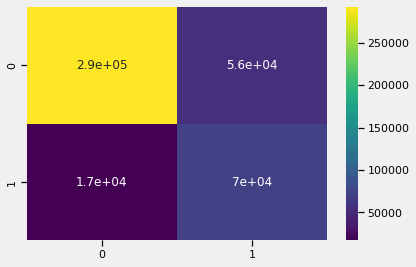

In [44]:
# Applying the probability threshold to Training Predictions
y_train_pred = (y_train_pred_proba >= 0.25).astype('int64')[:, 1]

# Performance Metrics
print('Training Accuracy: ', accuracy_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training Precision Score: ', precision_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training Recall Score: ', recall_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training F1-Score: ', f1_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
con_mat = confusion_matrix(y_train.to_numpy().reshape(-1, 1), y_train_pred)
con_mat = pd.DataFrame(data = con_mat, index = [0, 1], columns = [0, 1])
plot12 = sns.heatmap(con_mat, annot = True, cmap = 'viridis')

This means that a Logistic Regression Model with probability threshold of 0.25 results in a ~20% false negative percentage which is an improvement from the previous stat of ~45%. Let's checkout the metrics for Validation set as well

Validation Accuracy:  0.8571502927781393
Validation Precision Score:  0.6233820459290188
Validation Recall Score:  0.7604737043168216
Validation F1-Score:  0.6851373831239603


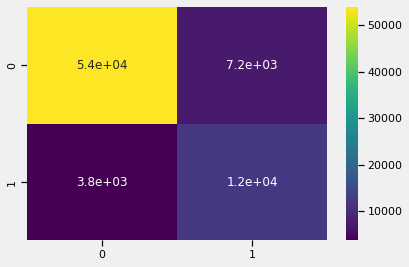

In [45]:
# Applying the probability threshold to Validation set predictions
y_val_pred_proba = LogReg.predict_proba(X_val.to_numpy())
y_val_pred = (y_val_pred_proba >= 0.3).astype('int64')[:, 1]

# Performance Metrics
print('Validation Accuracy: ', accuracy_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation Precision Score: ', precision_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation Recall Score: ', recall_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation F1-Score: ', f1_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))

con_mat = confusion_matrix(y_val.to_numpy().reshape(-1, 1), y_val_pred)
con_mat = pd.DataFrame(data = con_mat, index = [0, 1], columns = [0, 1])
plot13 = sns.heatmap(con_mat, annot = True, cmap = 'viridis')